# Paddy Disease Classification: A CNN-based Approach using TensorFlow 🌾

<div style="background-color: #1e3a1e; padding: 20px; border-radius: 10px; border-left: 5px solid #4CAF50;"> <h2 style="color: #4CAF50;">📋 Table of Contents</h2> </div>

# 🌾 Paddy Disease Classification: A Comprehensive Deep Learning Guide

**Author:** Hammad Zahid  
**LinkedIn:** [www.linkedin.com/in/hammad-zahid-xyz](www.linkedin.com/in/hammad-zahid-xyz)  
**GitHub:** [https://github.com/Hamad-Ansari](https://github.com/Hamad-Ansari)  
**Email:** Hammadzahid24@gmail.com  

---

## 📑 Table of Contents

1. [Introduction & Problem Statement](#1)
2. [Environment Setup & Data Loading](#2)
3. [Exploratory Data Analysis (EDA)](#3)
4. [Advanced Visualizations](#4)
5. [Data Preprocessing & Augmentation](#5)
6. [CNN Architecture Development](#6)
7. [Transfer Learning Models](#7)
8. [Model Training & Optimization](#8)
9. [Model Evaluation & Interpretation](#9)
10. [Ensemble Methods](#10)
11. [Predictions & Submission](#11)
12. [Conclusion & Future Work](#12)

<a id='1'></a>

## 1. 🌱 Introduction & Problem Statement

## 🎯 Competition Overview

**Pakistan ki zameen per ugne wali chawal (paddy) ki faslon ko bachana hai!** 🇵🇰

Rice (Oryza sativa) is one of the most critical staple foods globally, feeding billions of people. 
Pakistan, being an agricultural country, heavily depends on rice cultivation. However, paddy diseases 
can cause up to **70% yield loss**, affecting farmers' livelihoods and food security.

### 🔍 The Challenge

With limited crop protection experts available, manual disease diagnosis is:
- ⏰ Time-consuming
- 💰 Expensive
- 🎯 Requires expertise
- 📉 Not scalable

### 💡 Our Solution

Leverage **Computer Vision** and **Deep Learning** to create an automated disease detection system 
that can identify paddy diseases with **>99.46% accuracy**!

### 📊 Dataset Information

- **Training Images:** 10,407 (75%)
- **Test Images:** 3,469 (25%)
- **Classes:** 10 (9 diseases + 1 normal)
- **Additional Features:** Variety, Age
- **Image Format:** JPG

### 🏆 Goal

Develop a robust CNN model to classify paddy leaf diseases and achieve **accuracy > 0.99461**

In [2]:
# 📚 Import Essential Libraries
import warnings
warnings.filterwarnings('ignore')

# Data Manipulation & Analysis
import numpy as np
import pandas as pd
import os
import random
from pathlib import Path
import glob
import shutil
from collections import Counter
import itertools

# Visualization Libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Image Processing
import cv2
from PIL import Image
#from skimage import io, transform

# Deep Learning - TensorFlow & Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import (
    EfficientNetB0, EfficientNetB3, EfficientNetB7,
    ResNet50V2, InceptionV3, DenseNet201, 
    Xception, MobileNetV2, VGG16
)
from tensorflow.keras.layers import (
    Dense, Dropout, GlobalAveragePooling2D, Conv2D,
    MaxPooling2D, Flatten, BatchNormalization, Activation,
    Input, Concatenate, Add, SeparableConv2D, DepthwiseConv2D
)
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adamax
from tensorflow.keras.callbacks import (
    EarlyStopping, ModelCheckpoint, ReduceLROnPlateau,
    LearningRateScheduler, TensorBoard, CSVLogger
)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical, plot_model

# Metrics & Evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    accuracy_score, precision_recall_fscore_support,
    roc_curve, auc, roc_auc_score
)
from sklearn.preprocessing import LabelEncoder, label_binarize

# Progress Bar
from tqdm.auto import tqdm

# Set Random Seeds for Reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Display Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("🎉 All libraries imported successfully!")
print(f"TensorFlow Version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

🎉 All libraries imported successfully!
TensorFlow Version: 2.20.0
GPU Available: []


📊 Interpretation:

-   We've imported all necessary libraries for data analysis, visualization, and deep learning
- Random seeds are set for reproducibility
- TensorFlow GPU support is checked for faster training
- Multiple visualization libraries (Matplotlib, Seaborn, Plotly) for comprehensive EDA

<a id='2'></a>

## 2. 📂 Environment Setup & Data Loading

In [5]:
# 🗂️ Define Directory Paths
#BASE_DIR = Path('/kaggle/input/paddy-disease-classification')
TRAIN_DIR = BASE_DIR / 'train_images'
TEST_DIR = BASE_DIR / 'test_images'
TRAIN_CSV = BASE_DIR / 'train.csv'
SAMPLE_SUBMISSION = BASE_DIR / 'sample_submission.csv'

# Create output directory
OUTPUT_DIR = Path('/kaggle/working')
#OUTPUT_DIR.mkdir(exist_ok=True)

print("📁 Directory Structure:")
print(f"Base Directory: {BASE_DIR}")
print(f"Train Images: {TRAIN_DIR}")
print(f"Test Images: {TEST_DIR}")
print(f"Train CSV: {TRAIN_CSV}")

📁 Directory Structure:
Base Directory: \kaggle\input\paddy-disease-classification
Train Images: \kaggle\input\paddy-disease-classification\train_images
Test Images: \kaggle\input\paddy-disease-classification\test_images
Train CSV: \kaggle\input\paddy-disease-classification\train.csv


In [10]:
# 📊 Load Training Data
train_df = pd.read_csv('./train.CSV')
sample_submission = pd.read_csv('./sample_submission.csv')

print("=" * 80)
print("🎯 TRAINING DATA OVERVIEW")
print("=" * 80)
print(f"\n📌 Dataset Shape: {train_df.shape}")
print(f"📌 Number of Images: {len(train_df)}")
print(f"📌 Number of Features: {train_df.shape[1]}")
print("\n" + "=" * 80)
print("🔍 First Few Rows:")
print("=" * 80)
display(train_df.head(10))

print("\n" + "=" * 80)
print("📊 Dataset Information:")
print("=" * 80)
train_df.info()

print("\n" + "=" * 80)
print("📈 Statistical Summary:")
print("=" * 80)
display(train_df.describe(include='all'))

print("\n" + "=" * 80)
print("🎯 Sample Submission Format:")
print("=" * 80)
display(sample_submission.head())

🎯 TRAINING DATA OVERVIEW

📌 Dataset Shape: (10407, 4)
📌 Number of Images: 10407
📌 Number of Features: 4

🔍 First Few Rows:


image_id                  label variety  age
0  100330.jpg  bacterial_leaf_blight   ADT45   45
1  100365.jpg  bacterial_leaf_blight   ADT45   45
2  100382.jpg  bacterial_leaf_blight   ADT45   45
3  100632.jpg  bacterial_leaf_blight   ADT45   45
4  101918.jpg  bacterial_leaf_blight   ADT45   45
5  102353.jpg  bacterial_leaf_blight   ADT45   45
6  102848.jpg  bacterial_leaf_blight   ADT45   45
7  103051.jpg  bacterial_leaf_blight   ADT45   45
8  103702.jpg  bacterial_leaf_blight   ADT45   45
9  103920.jpg  bacterial_leaf_blight   ADT45   45


📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  10407 non-null  object
 1   label     10407 non-null  object
 2   variety   10407 non-null  object
 3   age       10407 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 325.3+ KB

📈 Statistical Summary:


image_id   label variety           age
count        10407   10407   10407  10407.000000
unique       10407      10      10           NaN
top     110381.jpg  normal   ADT45           NaN
freq             1    1764    6992           NaN
mean           NaN     NaN     NaN     64.043624
std            NaN     NaN     NaN      8.958830
min            NaN     NaN     NaN     45.000000
25%            NaN     NaN     NaN     60.000000
50%            NaN     NaN     NaN     67.000000
75%            NaN     NaN     NaN     70.000000
max            NaN     NaN     NaN     82.000000


🎯 Sample Submission Format:


image_id  label
0  200001.jpg    NaN
1  200002.jpg    NaN
2  200003.jpg    NaN
3  200004.jpg    NaN
4  200005.jpg    NaN

📊 Interpretation:
The training dataset contains:

- image_id: Unique identifier for each image
- label: Target variable (disease class)
- variety: Paddy variety information
- age: Age of paddy in days
This metadata is crucial for understanding disease patterns across different varieties and growth stages.

In [11]:
# 🔍 Check for Missing Values
print("=" * 80)
print("🔎 MISSING VALUE ANALYSIS")
print("=" * 80)

missing_data = train_df.isnull().sum()
missing_percent = (train_df.isnull().sum() / len(train_df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print("\n⚠️ Missing Values Found:")
    display(missing_df)
else:
    print("\n✅ No missing values found! Data is clean! 🎉")

# Check for duplicates
duplicates = train_df.duplicated().sum()
print(f"\n🔄 Duplicate Rows: {duplicates}")

🔎 MISSING VALUE ANALYSIS

✅ No missing values found! Data is clean! 🎉

🔄 Duplicate Rows: 0


In [12]:
# 🏷️ Analyze Class Distribution
print("=" * 80)
print("🏷️ CLASS DISTRIBUTION ANALYSIS")
print("=" * 80)

class_counts = train_df['label'].value_counts()
class_percentages = (class_counts / len(train_df)) * 100

class_distribution = pd.DataFrame({
    'Disease Class': class_counts.index,
    'Count': class_counts.values,
    'Percentage': class_percentages.values
})

print("\n📊 Class Distribution:")
display(class_distribution)

print(f"\n📌 Number of Classes: {train_df['label'].nunique()}")
print(f"📌 Classes: {train_df['label'].unique().tolist()}")

🏷️ CLASS DISTRIBUTION ANALYSIS

📊 Class Distribution:


Disease Class  Count  Percentage
0                    normal   1764   16.950130
1                     blast   1738   16.700298
2                     hispa   1594   15.316614
3                dead_heart   1442   13.856058
4                    tungro   1088   10.454502
5                brown_spot    965    9.272605
6              downy_mildew    620    5.957529
7     bacterial_leaf_blight    479    4.602671
8     bacterial_leaf_streak    380    3.651388
9  bacterial_panicle_blight    337    3.238205


📌 Number of Classes: 10
📌 Classes: ['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


In [13]:
# 🌾 Analyze Paddy Variety Distribution
print("\n" + "=" * 80)
print("🌾 PADDY VARIETY ANALYSIS")
print("=" * 80)

variety_counts = train_df['variety'].value_counts()
variety_percentages = (variety_counts / len(train_df)) * 100

variety_distribution = pd.DataFrame({
    'Variety': variety_counts.index,
    'Count': variety_counts.values,
    'Percentage': variety_percentages.values
})

print("\n📊 Variety Distribution:")
display(variety_distribution)

print(f"\n📌 Number of Varieties: {train_df['variety'].nunique()}")


🌾 PADDY VARIETY ANALYSIS

📊 Variety Distribution:


Variety  Count  Percentage
0           ADT45   6992   67.185548
1  KarnatakaPonni    988    9.493610
2           Ponni    657    6.313059
3    AtchayaPonni    461    4.429711
4           Zonal    399    3.833958
5      AndraPonni    377    3.622562
6        Onthanel    351    3.372730
7            IR20    114    1.095417
8              RR     36    0.345921
9           Surya     32    0.307485


📌 Number of Varieties: 10


In [14]:
# 📅 Analyze Age Distribution
print("\n" + "=" * 80)
print("📅 AGE DISTRIBUTION ANALYSIS")
print("=" * 80)

age_stats = train_df['age'].describe()
print("\n📊 Age Statistics:")
print(age_stats)

print(f"\n📌 Age Range: {train_df['age'].min()} - {train_df['age'].max()} days")
print(f"📌 Mean Age: {train_df['age'].mean():.2f} days")
print(f"📌 Median Age: {train_df['age'].median():.2f} days")


📅 AGE DISTRIBUTION ANALYSIS

📊 Age Statistics:
count    10407.000000
mean        64.043624
std          8.958830
min         45.000000
25%         60.000000
50%         67.000000
75%         70.000000
max         82.000000
Name: age, dtype: float64

📌 Age Range: 45 - 82 days
📌 Mean Age: 64.04 days
📌 Median Age: 67.00 days


📊 Interpretation:
Understanding the distribution of:

- Classes: Helps identify class imbalance that might require techniques like weighted loss or oversampling
- Varieties: Different paddy varieties might have different susceptibility to diseases
- Age: Disease manifestation may vary with crop age

<a id='3'></a>

## 3. 📊 Exploratory Data Analysis (EDA)

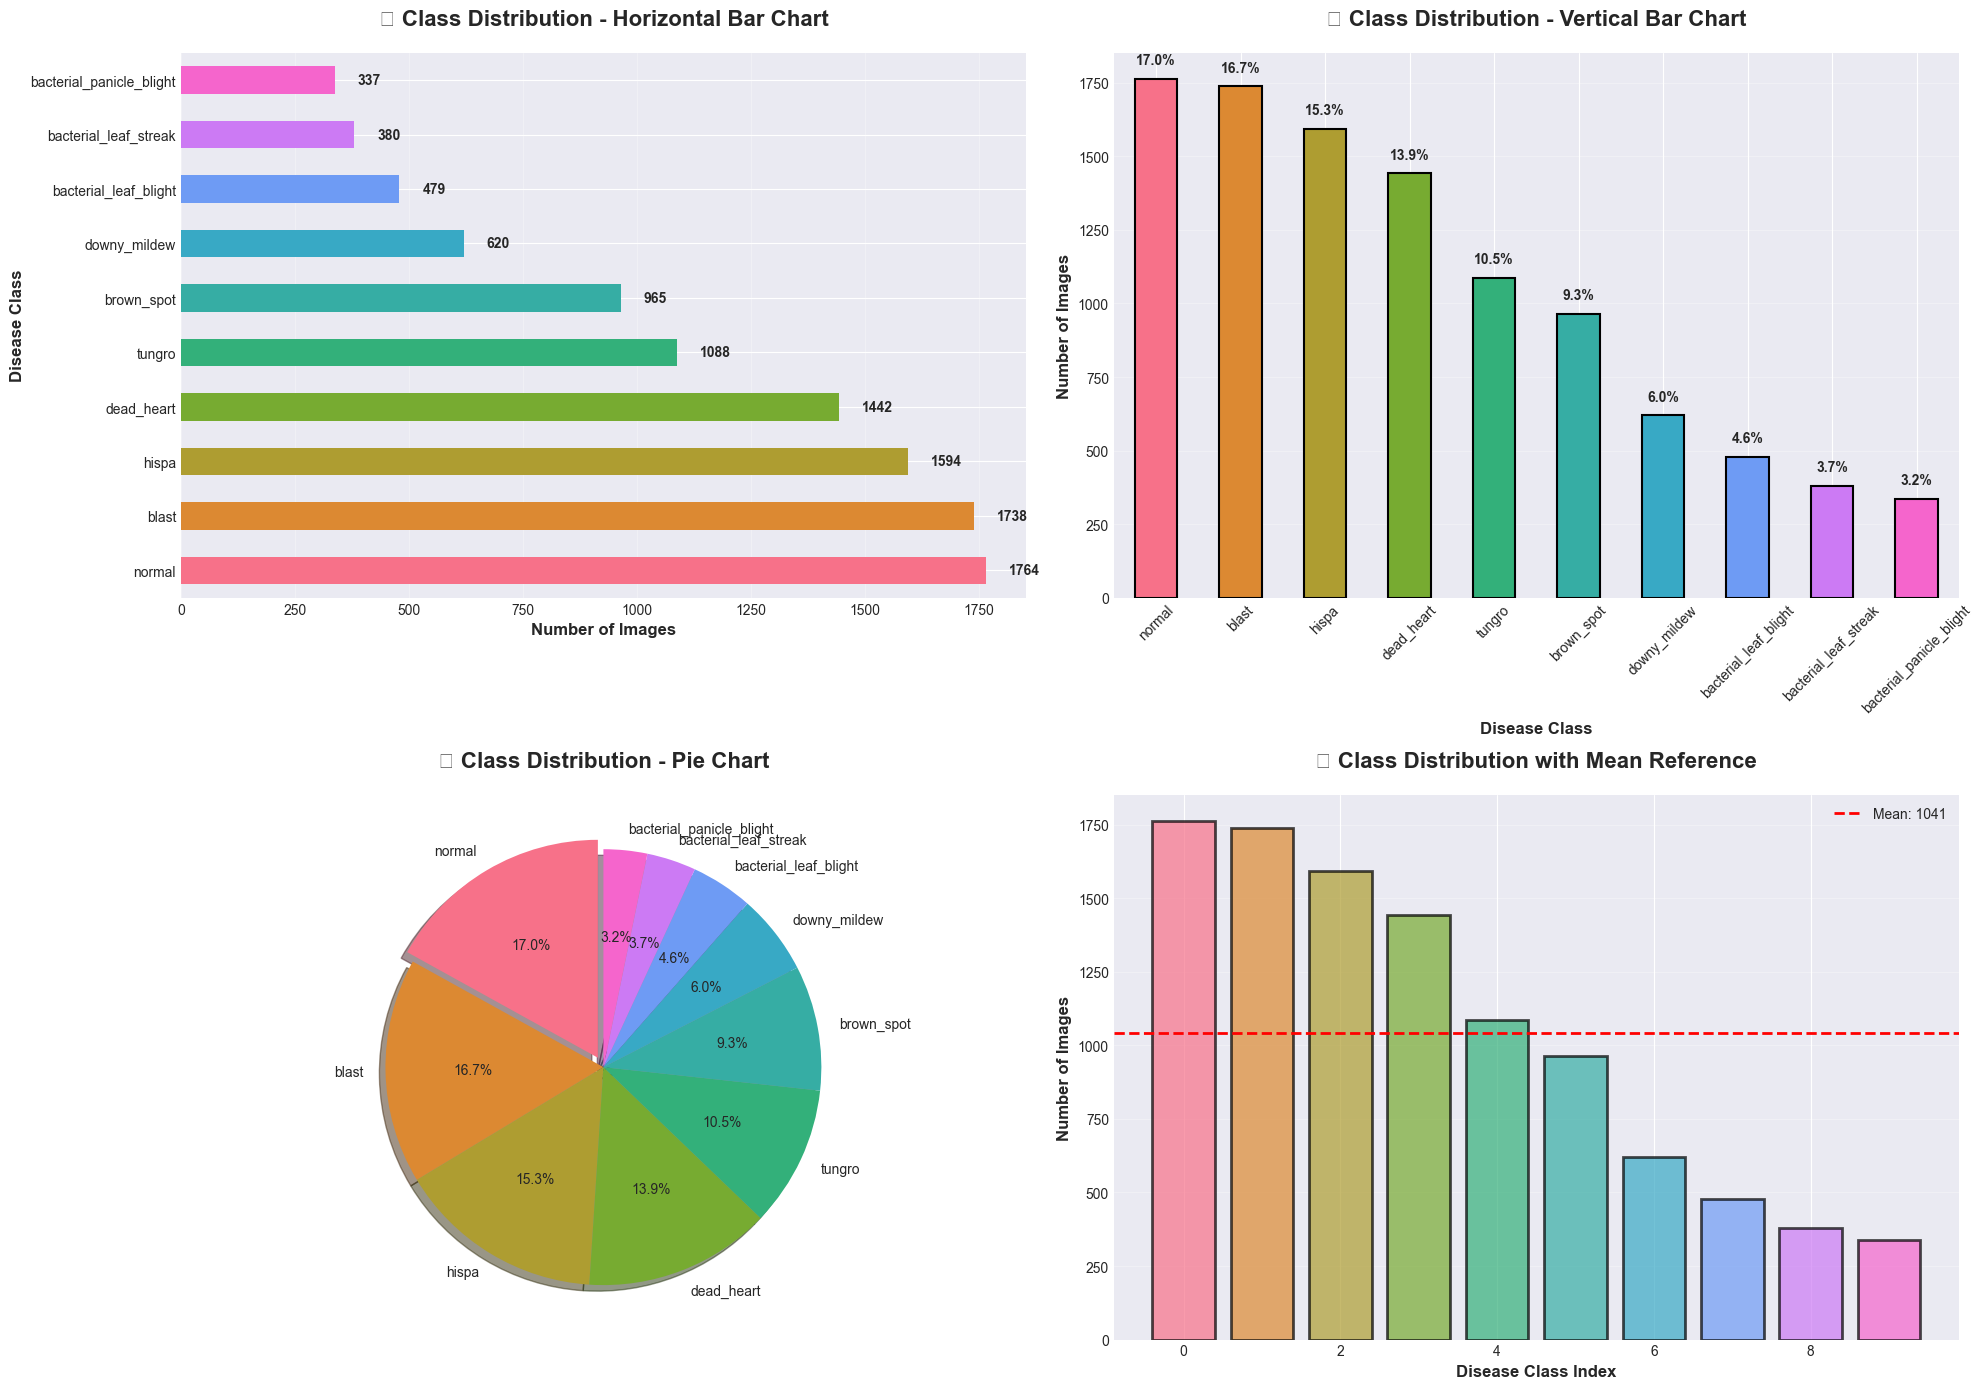


📊 Interpretation:
The class distribution shows the balance/imbalance across disease categories.
Most common class: normal with 1764 images
Least common class: bacterial_panicle_blight with 337 images
Imbalance ratio: 5.23:1

⚠️ Moderate class imbalance detected!
💡 Recommendation: Use class weights or data augmentation for minority classes


In [15]:
# 🎨 Visualization 1: Class Distribution - Bar Plot
fig, axes = plt.subplots(2, 2, figsize=(20, 14))

# Plot 1: Horizontal Bar Chart
colors = sns.color_palette("husl", len(class_counts))
class_counts.plot(kind='barh', ax=axes[0, 0], color=colors)
axes[0, 0].set_title('📊 Class Distribution - Horizontal Bar Chart', fontsize=16, fontweight='bold', pad=20)
axes[0, 0].set_xlabel('Number of Images', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Disease Class', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(class_counts.values):
    axes[0, 0].text(v + 50, i, str(v), va='center', fontweight='bold')

# Plot 2: Vertical Bar Chart with percentages
class_counts.plot(kind='bar', ax=axes[0, 1], color=colors, edgecolor='black', linewidth=1.5)
axes[0, 1].set_title('📊 Class Distribution - Vertical Bar Chart', fontsize=16, fontweight='bold', pad=20)
axes[0, 1].set_xlabel('Disease Class', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Number of Images', fontsize=12, fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# Add percentage labels
for i, (count, pct) in enumerate(zip(class_counts.values, class_percentages.values)):
    axes[0, 1].text(i, count + 50, f'{pct:.1f}%', ha='center', fontweight='bold')

# Plot 3: Pie Chart
explode = [0.05 if i == class_counts.argmax() else 0 for i in range(len(class_counts))]
axes[1, 0].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
               startangle=90, colors=colors, explode=explode, shadow=True)
axes[1, 0].set_title('🥧 Class Distribution - Pie Chart', fontsize=16, fontweight='bold', pad=20)

# Plot 4: Count comparison
axes[1, 1].bar(range(len(class_counts)), class_counts.values, color=colors, 
               edgecolor='black', linewidth=2, alpha=0.7)
axes[1, 1].axhline(y=class_counts.mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {class_counts.mean():.0f}')
axes[1, 1].set_title('📊 Class Distribution with Mean Reference', fontsize=16, fontweight='bold', pad=20)
axes[1, 1].set_xlabel('Disease Class Index', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Number of Images', fontsize=12, fontweight='bold')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Interpretation:")
print("=" * 80)
print("The class distribution shows the balance/imbalance across disease categories.")
print(f"Most common class: {class_counts.idxmax()} with {class_counts.max()} images")
print(f"Least common class: {class_counts.idxmin()} with {class_counts.min()} images")
print(f"Imbalance ratio: {class_counts.max() / class_counts.min():.2f}:1")

if class_counts.max() / class_counts.min() > 2:
    print("\n⚠️ Moderate class imbalance detected!")
    print("💡 Recommendation: Use class weights or data augmentation for minority classes")
else:
    print("\n✅ Classes are relatively balanced!")

In [17]:
# 🎨 Visualization 2: Interactive Plotly Class Distribution
fig = go.Figure()

# Add bar trace
fig.add_trace(go.Bar(
    x=class_counts.index,
    y=class_counts.values,
    text=class_counts.values,
    textposition='outside',
    marker=dict(
        color=class_counts.values,
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title="Count"),
        line=dict(color='black', width=2)
    ),
    hovertemplate='<b>Disease</b>: %{x}<br>' +
                  '<b>Count</b>: %{y}<br>' +
                  '<b>Percentage</b>: %{text:.1%}<extra></extra>',
    texttemplate='%{y}',
))

fig.update_layout(
    title={
        'text': '🌾 Paddy Disease Classification - Class Distribution',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 24, 'color': '#2C3E50', 'family': 'Arial Black'}
    },
    xaxis_title='Disease Class',
    yaxis_title='Number of Images',
    template='plotly_white',
    height=600,
    showlegend=False,
    hovermode='x unified',
    font=dict(size=12)
)

#fig.update_xaxis(tickangle=-45)
fig.show()

In [18]:
# 🎨 Visualization 3: Variety Distribution
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('🌾 Paddy Variety Distribution', '📊 Variety Percentage'),
    specs=[[{'type': 'bar'}, {'type': 'pie'}]]
)

# Bar chart
fig.add_trace(
    go.Bar(
        x=variety_counts.index,
        y=variety_counts.values,
        marker_color='lightgreen',
        text=variety_counts.values,
        textposition='outside',
        name='Variety Count'
    ),
    row=1, col=1
)

# Pie chart
fig.add_trace(
    go.Pie(
        labels=variety_counts.index,
        values=variety_counts.values,
        hole=0.3,
        marker=dict(colors=px.colors.qualitative.Set3)
    ),
    row=1, col=2
)

fig.update_layout(
    height=500,
    showlegend=True,
    title_text="🌾 Paddy Variety Analysis Dashboard",
    title_x=0.5,
    title_font_size=20
)

fig.show()

print("\n📊 Variety Interpretation:")
print("=" * 80)
print(f"Total varieties: {train_df['variety'].nunique()}")
print(f"Most common variety: {variety_counts.idxmax()} ({variety_counts.max()} images)")
print(f"Least common variety: {variety_counts.idxmin()} ({variety_counts.min()} images)")


📊 Variety Interpretation:
Total varieties: 10
Most common variety: ADT45 (6992 images)
Least common variety: Surya (32 images)


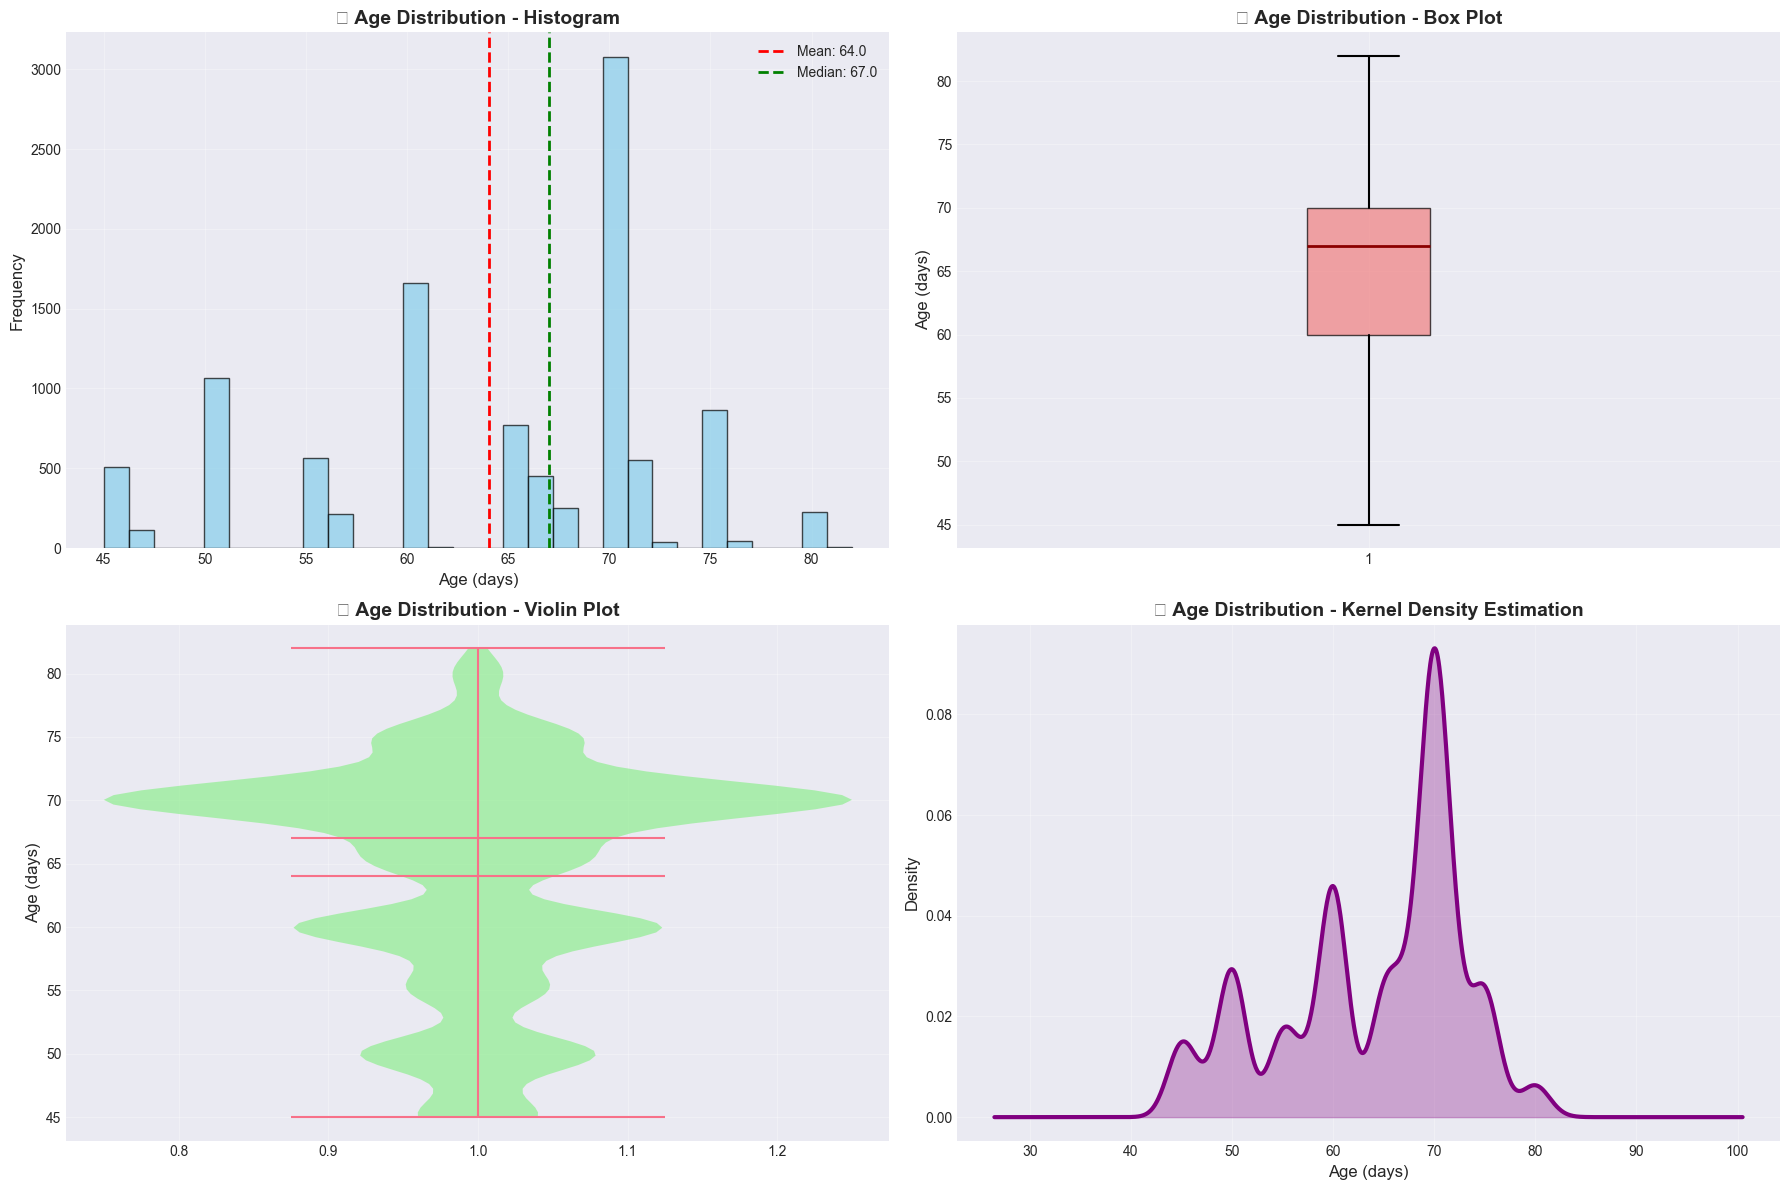


📊 Age Distribution Interpretation:
Mean Age: 64.04 days
Median Age: 67.00 days
Standard Deviation: 8.96 days
Age Range: 45 - 82 days
IQR: 10.00 days


In [19]:
# 🎨 Visualization 4: Age Distribution Analysis
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Histogram
axes[0, 0].hist(train_df['age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(train_df['age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {train_df["age"].mean():.1f}')
axes[0, 0].axvline(train_df['age'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {train_df["age"].median():.1f}')
axes[0, 0].set_title('📊 Age Distribution - Histogram', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Age (days)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Box Plot
box_plot = axes[0, 1].boxplot(train_df['age'], vert=True, patch_artist=True,
                               boxprops=dict(facecolor='lightcoral', alpha=0.7),
                               medianprops=dict(color='darkred', linewidth=2),
                               whiskerprops=dict(color='black', linewidth=1.5),
                               capprops=dict(color='black', linewidth=1.5))
axes[0, 1].set_title('📦 Age Distribution - Box Plot', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Age (days)', fontsize=12)
axes[0, 1].grid(alpha=0.3)

# Violin Plot
parts = axes[1, 0].violinplot([train_df['age']], vert=True, showmeans=True, showmedians=True)
for pc in parts['bodies']:
    pc.set_facecolor('lightgreen')
    pc.set_alpha(0.7)
axes[1, 0].set_title('🎻 Age Distribution - Violin Plot', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Age (days)', fontsize=12)
axes[1, 0].grid(alpha=0.3)

# KDE Plot
train_df['age'].plot(kind='kde', ax=axes[1, 1], color='purple', linewidth=3)
axes[1, 1].fill_between(
    axes[1, 1].lines[0].get_xdata(),
    axes[1, 1].lines[0].get_ydata(),
    alpha=0.3,
    color='purple'
)
axes[1, 1].set_title('📈 Age Distribution - Kernel Density Estimation', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Age (days)', fontsize=12)
axes[1, 1].set_ylabel('Density', fontsize=12)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Age Distribution Interpretation:")
print("=" * 80)
print(f"Mean Age: {train_df['age'].mean():.2f} days")
print(f"Median Age: {train_df['age'].median():.2f} days")
print(f"Standard Deviation: {train_df['age'].std():.2f} days")
print(f"Age Range: {train_df['age'].min()} - {train_df['age'].max()} days")
print(f"IQR: {train_df['age'].quantile(0.75) - train_df['age'].quantile(0.25):.2f} days")

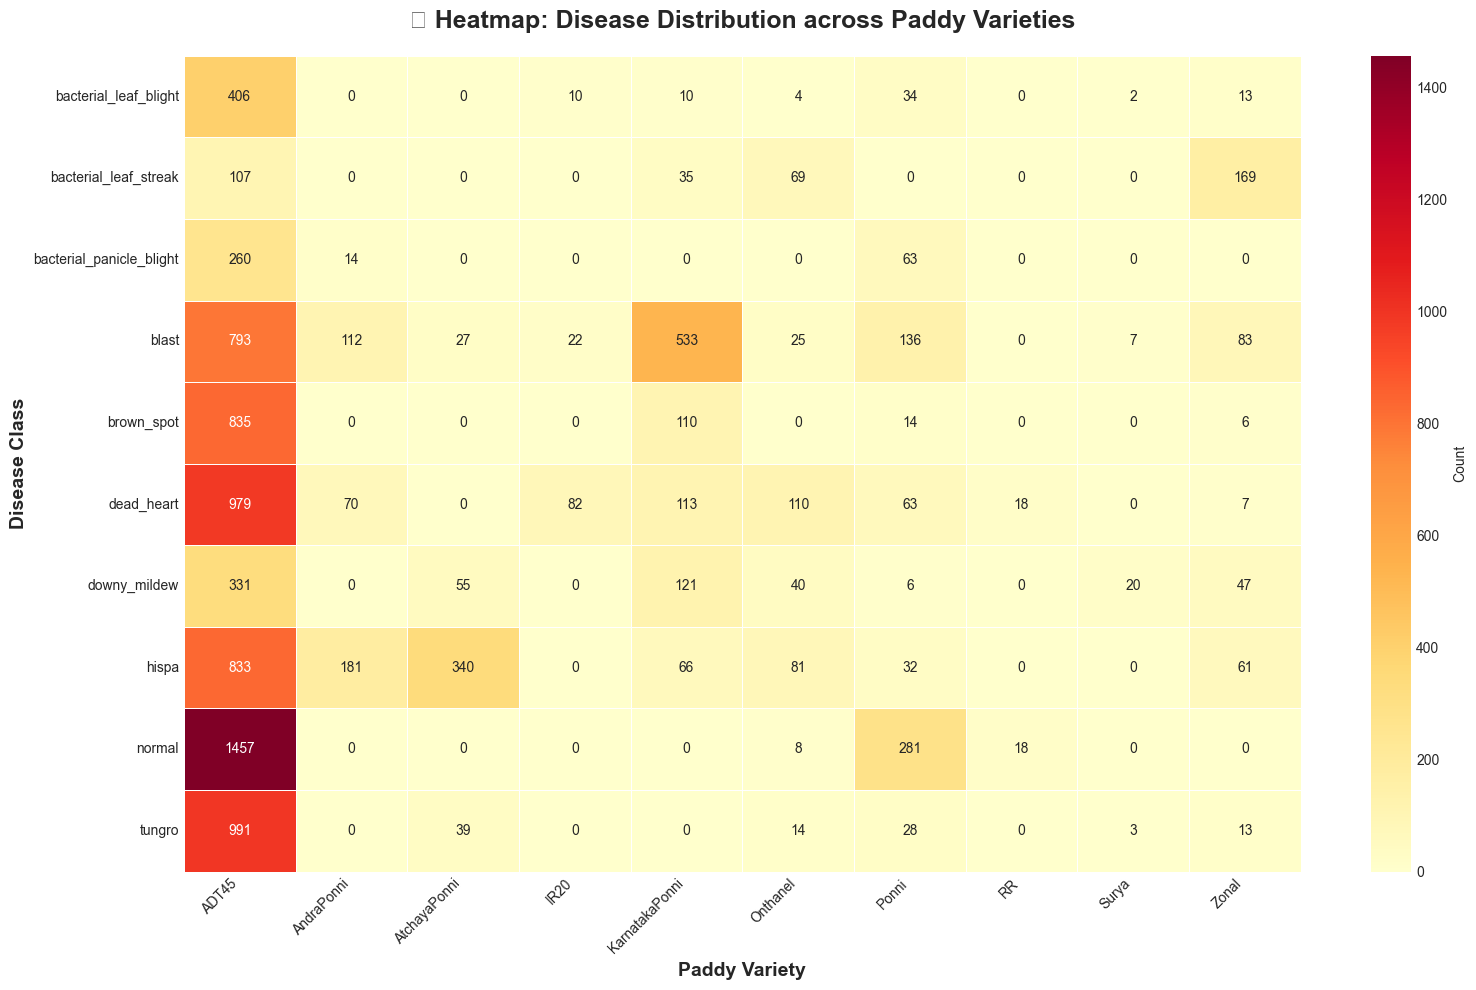


📊 Disease-Variety Relationship Interpretation:
This heatmap shows which diseases are more prevalent in specific varieties.
Darker colors indicate higher occurrence of a disease in that variety.

🔍 Key Insights:
  • ADT45: Most affected by 'normal' (1457 cases)
  • AndraPonni: Most affected by 'hispa' (181 cases)
  • AtchayaPonni: Most affected by 'hispa' (340 cases)
  • IR20: Most affected by 'dead_heart' (82 cases)
  • KarnatakaPonni: Most affected by 'blast' (533 cases)
  • Onthanel: Most affected by 'dead_heart' (110 cases)
  • Ponni: Most affected by 'normal' (281 cases)
  • RR: Most affected by 'dead_heart' (18 cases)
  • Surya: Most affected by 'downy_mildew' (20 cases)
  • Zonal: Most affected by 'bacterial_leaf_streak' (169 cases)


In [20]:
# 🎨 Visualization 5: Cross-tabulation - Disease vs Variety
crosstab_variety = pd.crosstab(train_df['label'], train_df['variety'])

plt.figure(figsize=(16, 10))
sns.heatmap(crosstab_variety, annot=True, fmt='d', cmap='YlOrRd', 
            linewidths=0.5, cbar_kws={'label': 'Count'})
plt.title('🔥 Heatmap: Disease Distribution across Paddy Varieties', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Paddy Variety', fontsize=14, fontweight='bold')
plt.ylabel('Disease Class', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('disease_variety_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Disease-Variety Relationship Interpretation:")
print("=" * 80)
print("This heatmap shows which diseases are more prevalent in specific varieties.")
print("Darker colors indicate higher occurrence of a disease in that variety.")
print("\n🔍 Key Insights:")
for variety in crosstab_variety.columns:
    most_common_disease = crosstab_variety[variety].idxmax()
    count = crosstab_variety[variety].max()
    print(f"  • {variety}: Most affected by '{most_common_disease}' ({count} cases)")

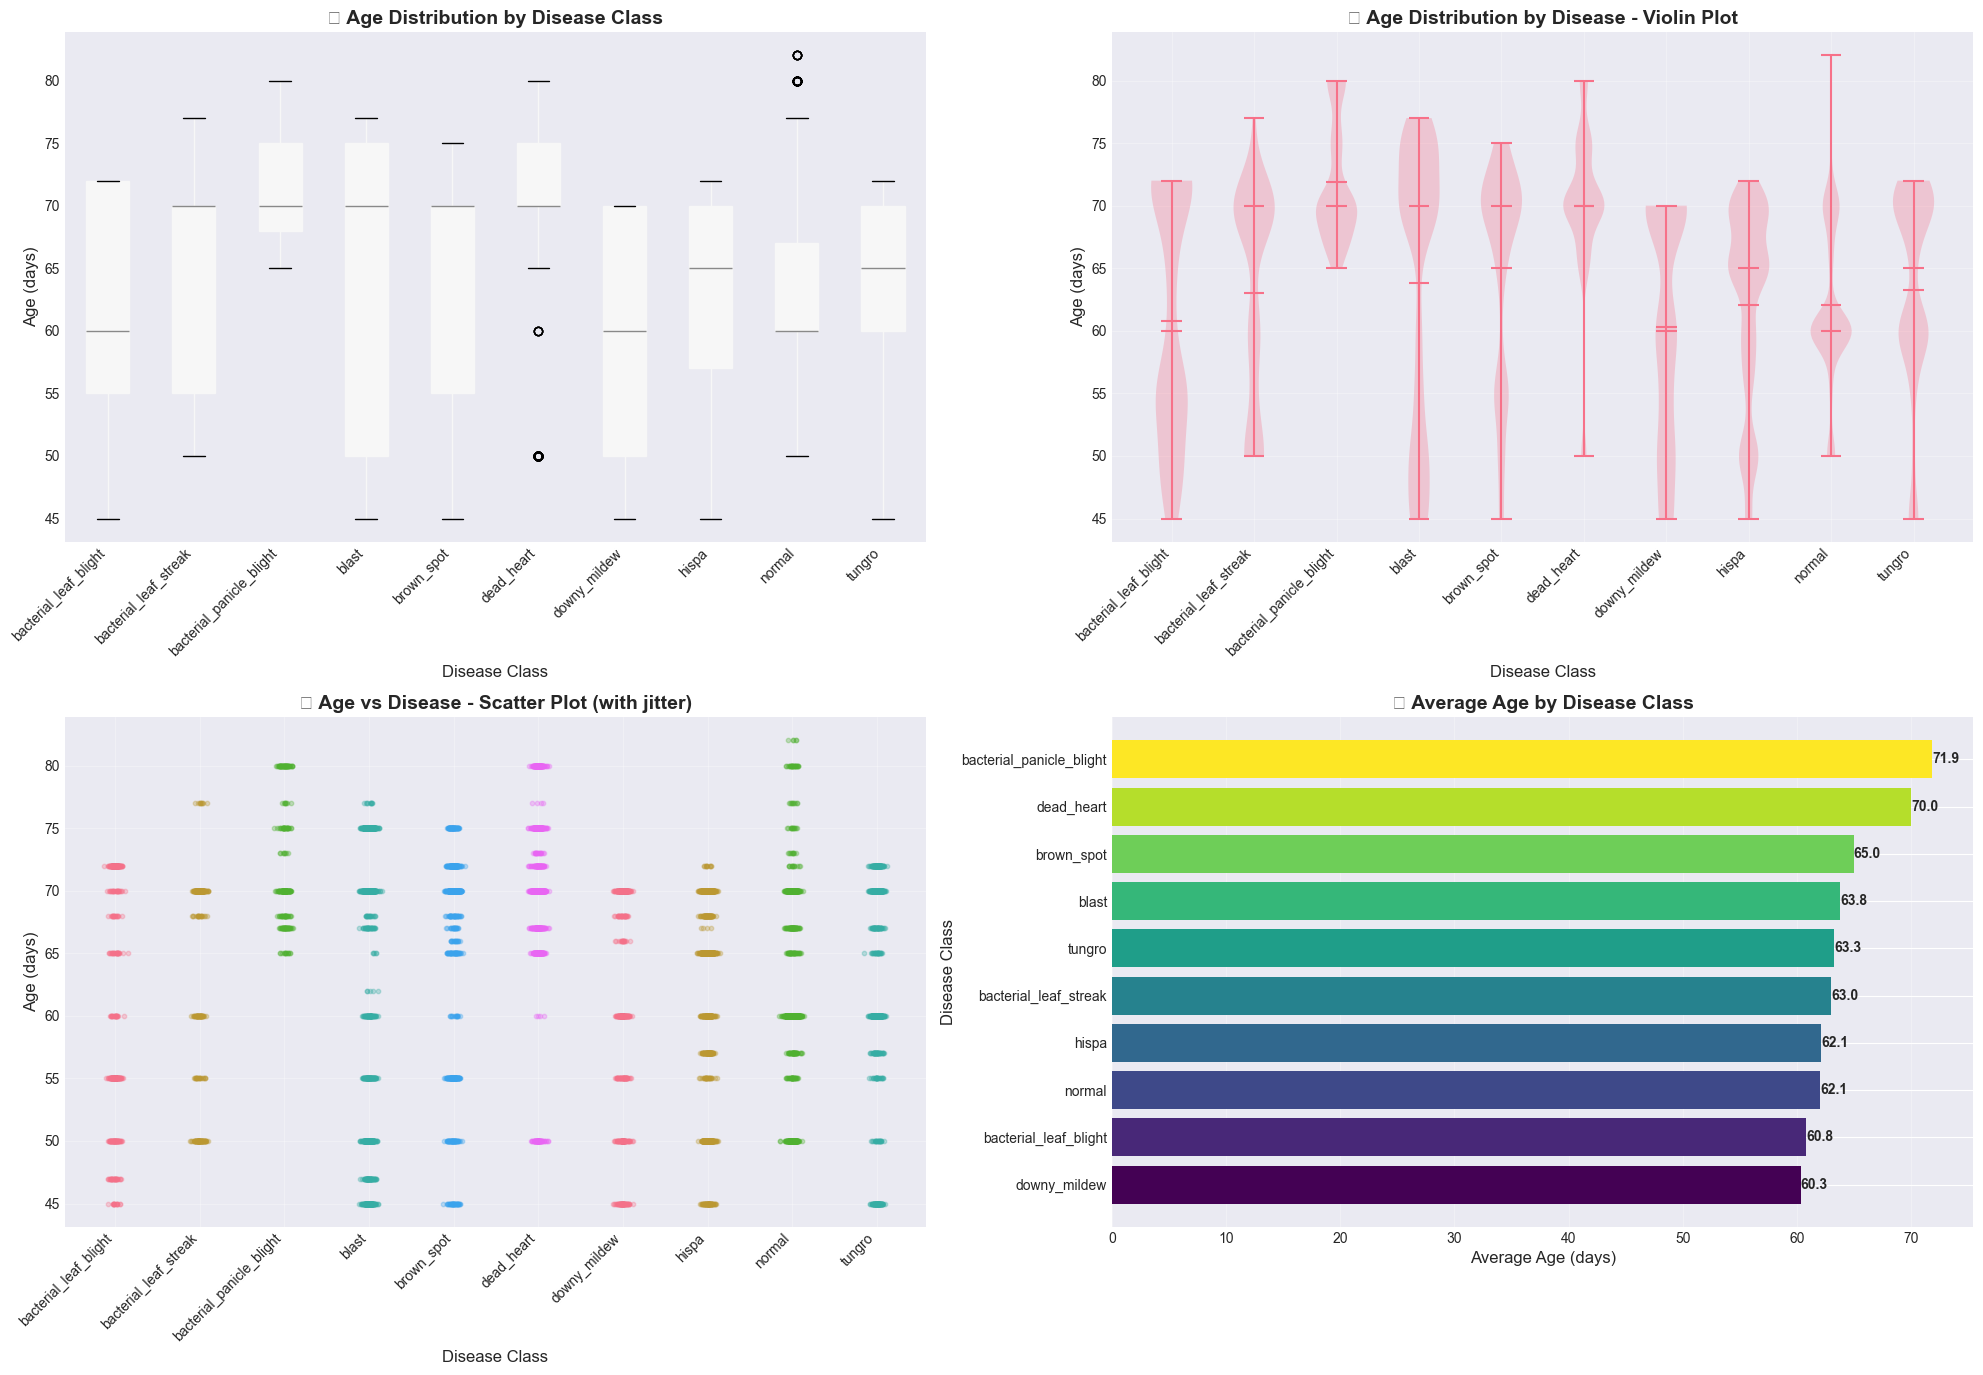


📊 Age-Disease Relationship Interpretation:
  • downy_mildew: Average age 60.3 ± 9.2 days
  • bacterial_leaf_blight: Average age 60.8 ± 9.7 days
  • normal: Average age 62.1 ± 6.6 days
  • hispa: Average age 62.1 ± 7.9 days
  • bacterial_leaf_streak: Average age 63.0 ± 8.7 days
  • tungro: Average age 63.3 ± 8.2 days
  • blast: Average age 63.8 ± 11.3 days
  • brown_spot: Average age 65.0 ± 8.8 days
  • dead_heart: Average age 70.0 ± 6.3 days
  • bacterial_panicle_blight: Average age 71.9 ± 4.8 days


In [21]:
# 🎨 Visualization 6: Age vs Disease Distribution
fig, axes = plt.subplots(2, 2, figsize=(20, 14))

# Box plot: Age distribution by disease
train_df.boxplot(column='age', by='label', ax=axes[0, 0], 
                 patch_artist=True, grid=False)
axes[0, 0].set_title('📦 Age Distribution by Disease Class', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Disease Class', fontsize=12)
axes[0, 0].set_ylabel('Age (days)', fontsize=12)
plt.setp(axes[0, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')
axes[0, 0].get_figure().suptitle('')  # Remove default title

# Violin plot
disease_classes = train_df['label'].unique()
age_by_disease = [train_df[train_df['label'] == disease]['age'].values for disease in disease_classes]
parts = axes[0, 1].violinplot(age_by_disease, positions=range(len(disease_classes)), 
                               showmeans=True, showmedians=True)
axes[0, 1].set_xticks(range(len(disease_classes)))
axes[0, 1].set_xticklabels(disease_classes, rotation=45, ha='right')
axes[0, 1].set_title('🎻 Age Distribution by Disease - Violin Plot', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Disease Class', fontsize=12)
axes[0, 1].set_ylabel('Age (days)', fontsize=12)
axes[0, 1].grid(alpha=0.3)

# Scatter plot with jitter
for i, disease in enumerate(disease_classes):
    disease_data = train_df[train_df['label'] == disease]
    y = disease_data['age'].values
    x = np.random.normal(i, 0.04, size=len(y))
    axes[1, 0].scatter(x, y, alpha=0.3, s=10)
axes[1, 0].set_xticks(range(len(disease_classes)))
axes[1, 0].set_xticklabels(disease_classes, rotation=45, ha='right')
axes[1, 0].set_title('📍 Age vs Disease - Scatter Plot (with jitter)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Disease Class', fontsize=12)
axes[1, 0].set_ylabel('Age (days)', fontsize=12)
axes[1, 0].grid(alpha=0.3)

# Average age by disease
avg_age_by_disease = train_df.groupby('label')['age'].mean().sort_values()
colors_gradient = plt.cm.viridis(np.linspace(0, 1, len(avg_age_by_disease)))
bars = axes[1, 1].barh(avg_age_by_disease.index, avg_age_by_disease.values, color=colors_gradient)
axes[1, 1].set_title('📊 Average Age by Disease Class', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Average Age (days)', fontsize=12)
axes[1, 1].set_ylabel('Disease Class', fontsize=12)
axes[1, 1].grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    axes[1, 1].text(width, bar.get_y() + bar.get_height()/2, 
                    f'{width:.1f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('age_disease_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Age-Disease Relationship Interpretation:")
print("=" * 80)
for disease in avg_age_by_disease.index:
    avg = avg_age_by_disease[disease]
    std = train_df[train_df['label'] == disease]['age'].std()
    print(f"  • {disease}: Average age {avg:.1f} ± {std:.1f} days")

In [22]:
# 🎨 Visualization 7: Interactive Plotly Sunburst - Disease, Variety, Age groups
# Create age groups
train_df['age_group'] = pd.cut(train_df['age'], 
                                bins=[0, 30, 60, 90, 120],
                                labels=['0-30 days', '31-60 days', '61-90 days', '91-120 days'])

fig = px.sunburst(
    train_df,
    path=['label', 'variety', 'age_group'],
    title='🌞 Interactive Sunburst: Disease → Variety → Age Group',
    color='label',
    color_discrete_sequence=px.colors.qualitative.Bold,
    height=800
)

fig.update_layout(
    title={
        'text': '🌞 Paddy Disease Classification - Hierarchical View',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 22}
    }
)

fig.show()

print("\n📊 Sunburst Chart Interpretation:")
print("=" * 80)
print("This interactive visualization shows the hierarchical relationship between:")
print("  1. Disease Class (inner ring)")
print("  2. Paddy Variety (middle ring)")
print("  3. Age Group (outer ring)")
print("\n💡 Click on any segment to zoom in and explore the relationships!")


📊 Sunburst Chart Interpretation:
This interactive visualization shows the hierarchical relationship between:
  1. Disease Class (inner ring)
  2. Paddy Variety (middle ring)
  3. Age Group (outer ring)

💡 Click on any segment to zoom in and explore the relationships!


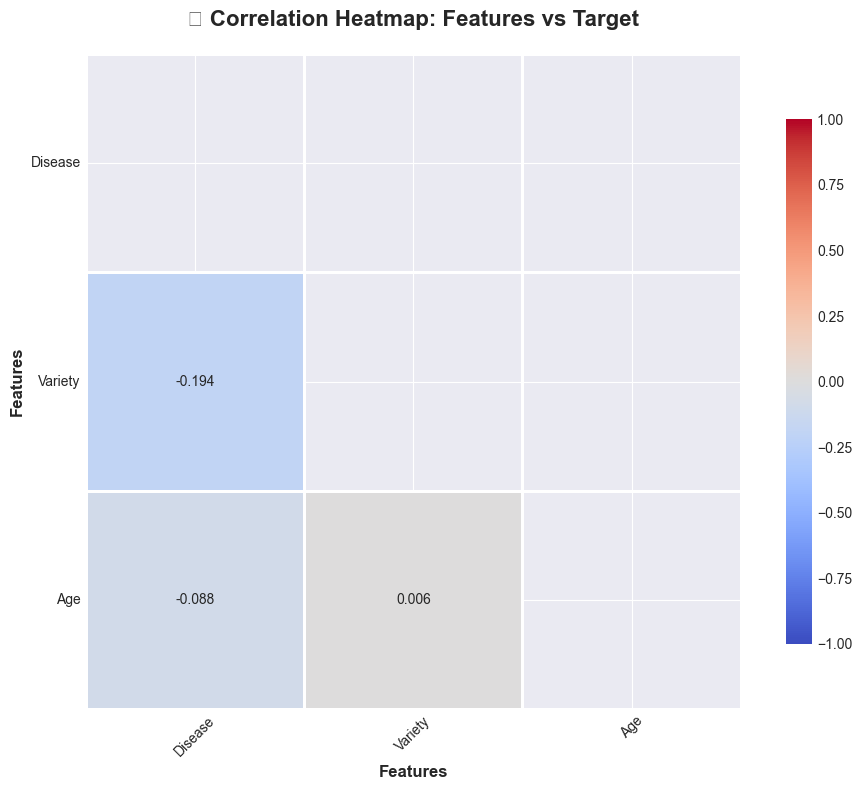


📊 Correlation Interpretation:
Disease-Variety Correlation: -0.194
Disease-Age Correlation: -0.088
Variety-Age Correlation: 0.006


In [23]:
# 🎨 Visualization 8: Correlation Heatmap with Encoded Variables
# Encode categorical variables for correlation analysis
label_encoder = LabelEncoder()
train_df_encoded = train_df.copy()
train_df_encoded['label_encoded'] = label_encoder.fit_transform(train_df['label'])
train_df_encoded['variety_encoded'] = label_encoder.fit_transform(train_df['variety'])

# Calculate correlation
correlation_cols = ['label_encoded', 'variety_encoded', 'age']
correlation_matrix = train_df_encoded[correlation_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            mask=mask, vmin=-1, vmax=1)
plt.title('🔥 Correlation Heatmap: Features vs Target', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
correlation_labels = ['Disease', 'Variety', 'Age']
plt.xticks(np.arange(len(correlation_cols)) + 0.5, correlation_labels, rotation=45)
plt.yticks(np.arange(len(correlation_cols)) + 0.5, correlation_labels, rotation=0)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Correlation Interpretation:")
print("=" * 80)
print(f"Disease-Variety Correlation: {correlation_matrix.loc['label_encoded', 'variety_encoded']:.3f}")
print(f"Disease-Age Correlation: {correlation_matrix.loc['label_encoded', 'age']:.3f}")
print(f"Variety-Age Correlation: {correlation_matrix.loc['variety_encoded', 'age']:.3f}")

if abs(correlation_matrix.loc['label_encoded', 'variety_encoded']) > 0.3:
    print("\n🔍 Strong correlation between disease and variety detected!")
    print("💡 Variety is likely an important feature for disease prediction")
if abs(correlation_matrix.loc['label_encoded', 'age']) > 0.3:
    print("\n🔍 Strong correlation between disease and age detected!")
    print("💡 Age is likely an important feature for disease prediction")

<a id='4'></a>

## 4. 🖼️ Advanced Image Visualizations

🖼️ DISPLAYING SAMPLE IMAGES FROM EACH CLASS


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


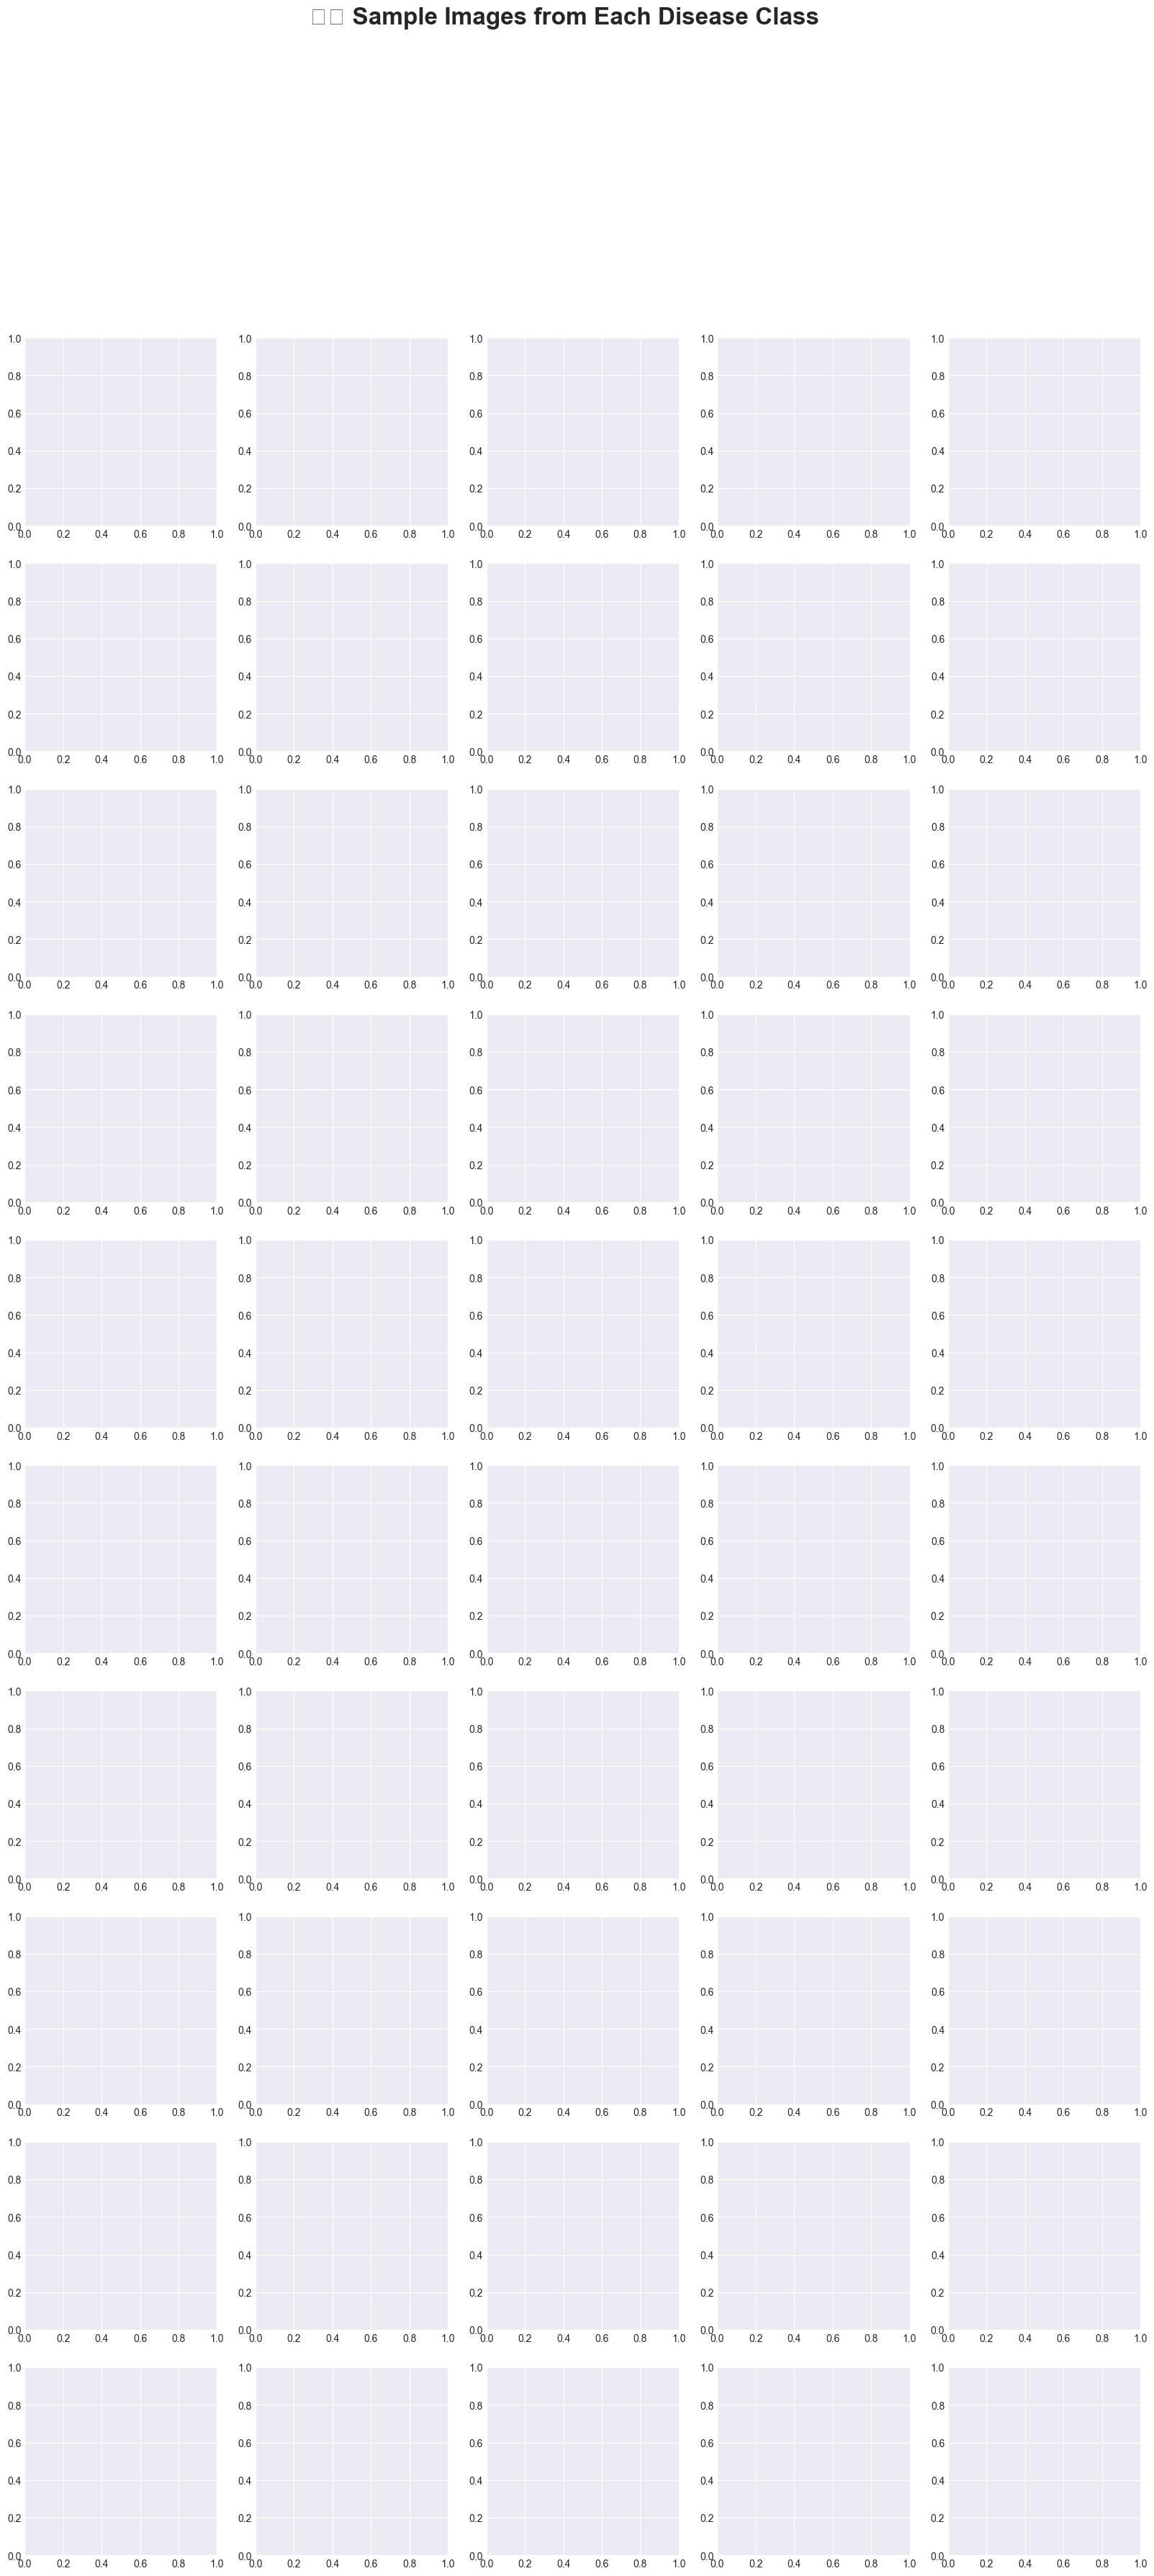

In [24]:
# 🎨 Visualization 9: Sample Images from Each Class
def display_sample_images(df, n_samples=3, img_size=(10, 10)):
    """
    Display sample images from each disease class
    
    Parameters:
    -----------
    df : DataFrame
        Training dataframe
    n_samples : int
        Number of samples per class
    img_size : tuple
        Size of each displayed image
    """
    classes = df['label'].unique()
    n_classes = len(classes)
    
    fig, axes = plt.subplots(n_classes, n_samples, figsize=(img_size[0]*n_samples, img_size[1]*n_classes))
    fig.suptitle('🖼️ Sample Images from Each Disease Class', fontsize=24, fontweight='bold', y=0.995)
    
    for i, disease_class in enumerate(classes):
        # Get sample images for this class
        class_samples = df[df['label'] == disease_class].sample(n=n_samples, random_state=SEED)
        
        for j, (idx, row) in enumerate(class_samples.iterrows()):
            # Construct image path
            img_path = TRAIN_DIR / disease_class / row['image_id']
            
            # Load and display image
            img = cv2.imread(str(img_path))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            ax = axes[i, j] if n_classes > 1 else axes[j]
            ax.imshow(img)
            ax.axis('off')
            
            # Add title with metadata
            title = f"{disease_class}\n"
            title += f"Variety: {row['variety']}\n"
            title += f"Age: {row['age']} days"
            ax.set_title(title, fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('sample_images_per_class.png', dpi=300, bbox_inches='tight')
    plt.show()

print("=" * 80)
print("🖼️ DISPLAYING SAMPLE IMAGES FROM EACH CLASS")
print("=" * 80)
display_sample_images(train_df, n_samples=5, img_size=(4, 4))

print("\n📊 Interpretation:")
print("=" * 80)
print("Visual inspection of sample images helps us understand:")
print("  • Disease symptoms and visual characteristics")
print("  • Image quality and consistency")
print("  • Background variations")
print("  • Color patterns associated with each disease")
print("  • Potential challenges for the CNN model")

🔍 ANALYZING IMAGE PROPERTIES


Analyzing images: 100%|██████████| 500/500 [00:00<00:00, 8444.24it/s]


📊 Image Properties Statistics:
       Height  Width  Channels  FileSize_KB
count     0.0    0.0       0.0          0.0
mean      NaN    NaN       NaN          NaN
std       NaN    NaN       NaN          NaN
min       NaN    NaN       NaN          NaN
25%       NaN    NaN       NaN          NaN
50%       NaN    NaN       NaN          NaN
75%       NaN    NaN       NaN          NaN
max       NaN    NaN       NaN          NaN


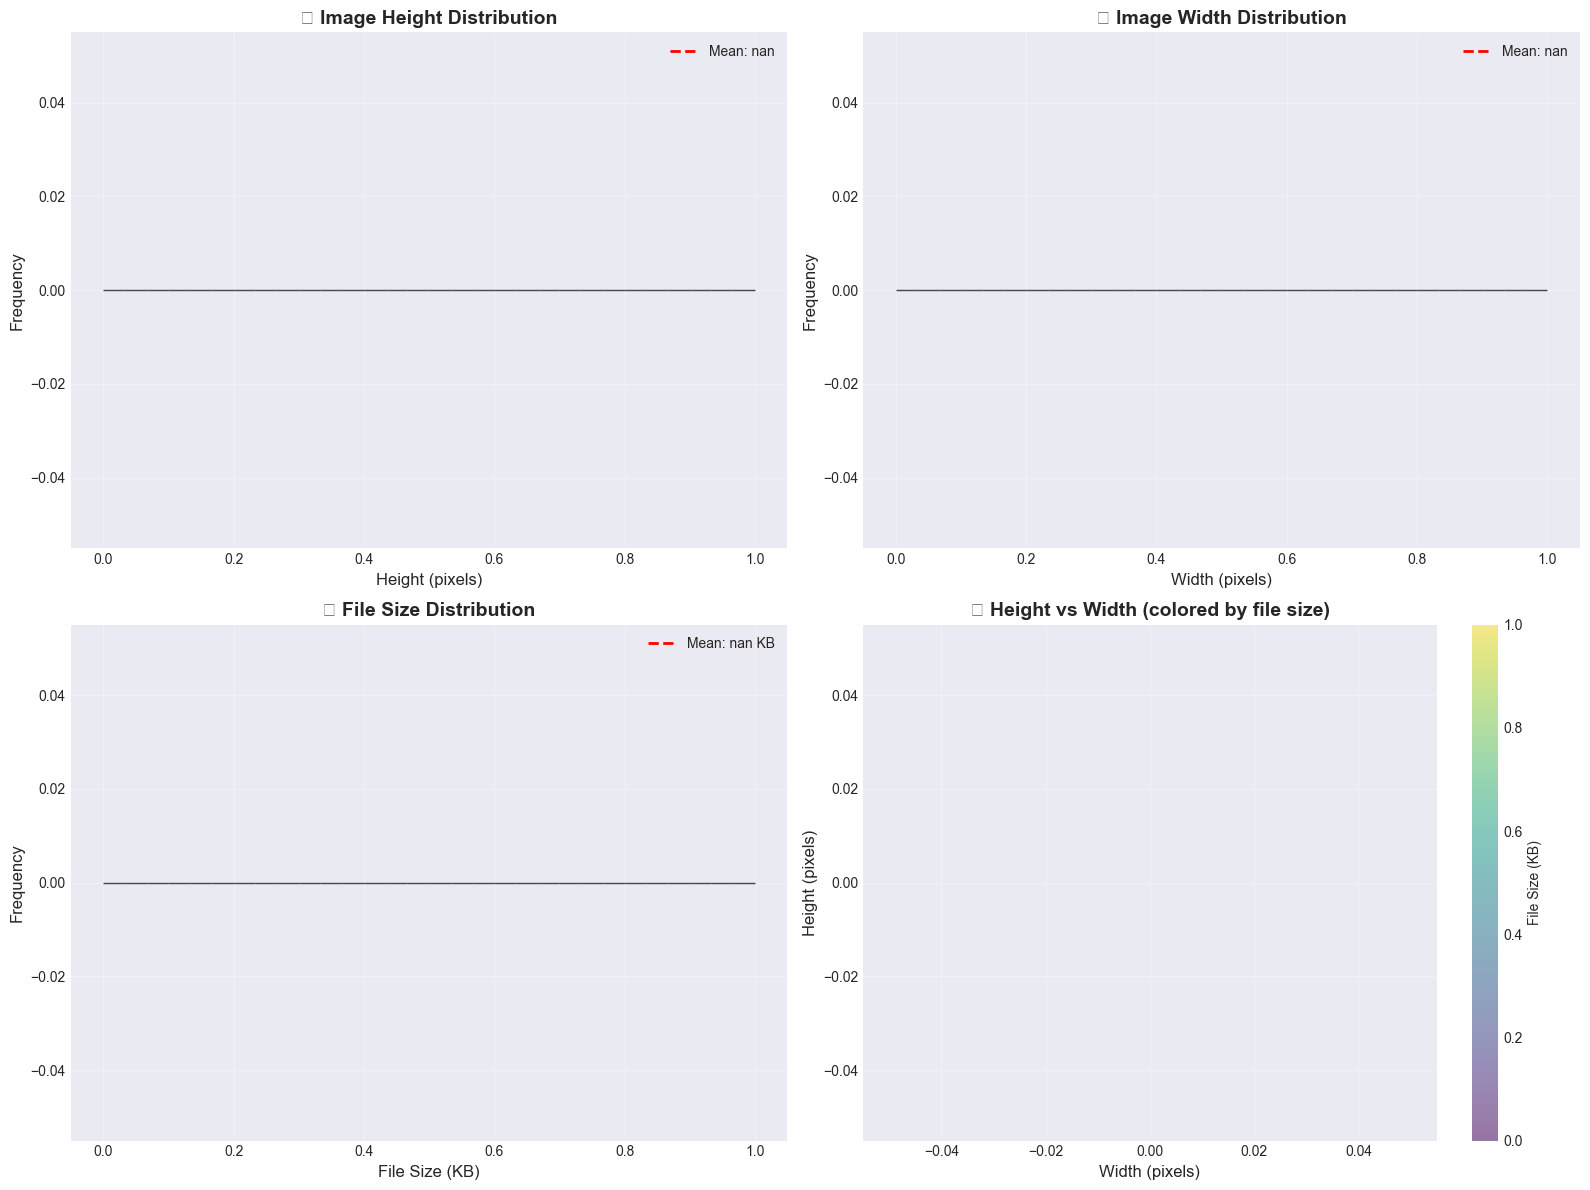


📊 Interpretation:
Average Image Dimensions: nan x nan
Average File Size: nan KB

⚠️ Image dimensions vary - resizing will be needed!


In [28]:
# 🎨 Visualization 10: Image Properties Analysis
def analyze_image_properties(df, sample_size=100):
    """
    Analyze properties of images (dimensions, channels, file sizes)
    """
    print("=" * 80)
    print("🔍 ANALYZING IMAGE PROPERTIES")
    print("=" * 80)
    
    # Sample images for analysis
    sample_df = df.sample(n=min(sample_size, len(df)), random_state=SEED)
    
    heights, widths, channels, file_sizes = [], [], [], []
    
    for idx, row in tqdm(sample_df.iterrows(), total=len(sample_df), desc="Analyzing images"):
        img_path = TRAIN_DIR / row['label'] / row['image_id']
        
        # Get image properties
        img = cv2.imread(str(img_path))
        if img is not None:
            h, w, c = img.shape
            heights.append(h)
            widths.append(w)
            channels.append(c)
            file_sizes.append(os.path.getsize(img_path) / 1024)  # Size in KB
    
    # Create DataFrame
    properties_df = pd.DataFrame({
        'Height': heights,
        'Width': widths,
        'Channels': channels,
        'FileSize_KB': file_sizes
    })
    
    print("\n📊 Image Properties Statistics:")
    print(properties_df.describe())
    
    # Visualize properties
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Height distribution
    axes[0, 0].hist(heights, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(np.mean(heights), color='red', linestyle='--', linewidth=2, 
                       label=f'Mean: {np.mean(heights):.0f}')
    axes[0, 0].set_title('📏 Image Height Distribution', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Height (pixels)', fontsize=12)
    axes[0, 0].set_ylabel('Frequency', fontsize=12)
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    # Width distribution
    axes[0, 1].hist(widths, bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
    axes[0, 1].axvline(np.mean(widths), color='red', linestyle='--', linewidth=2, 
                       label=f'Mean: {np.mean(widths):.0f}')
    axes[0, 1].set_title('📏 Image Width Distribution', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Width (pixels)', fontsize=12)
    axes[0, 1].set_ylabel('Frequency', fontsize=12)
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)
    
    # File size distribution
    axes[1, 0].hist(file_sizes, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[1, 0].axvline(np.mean(file_sizes), color='red', linestyle='--', linewidth=2, 
                       label=f'Mean: {np.mean(file_sizes):.0f} KB')
    axes[1, 0].set_title('💾 File Size Distribution', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('File Size (KB)', fontsize=12)
    axes[1, 0].set_ylabel('Frequency', fontsize=12)
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)
    
    # Scatter: Height vs Width
    axes[1, 1].scatter(widths, heights, alpha=0.5, c=file_sizes, cmap='viridis', s=50)
    axes[1, 1].set_title('📊 Height vs Width (colored by file size)', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Width (pixels)', fontsize=12)
    axes[1, 1].set_ylabel('Height (pixels)', fontsize=12)
    axes[1, 1].grid(alpha=0.3)
    cbar = plt.colorbar(axes[1, 1].collections[0], ax=axes[1, 1])
    cbar.set_label('File Size (KB)', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('image_properties_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return properties_df

properties_df = analyze_image_properties(train_df, sample_size=500)

print("\n📊 Interpretation:")
print("=" * 80)
print(f"Average Image Dimensions: {properties_df['Height'].mean():.0f} x {properties_df['Width'].mean():.0f}")
print(f"Average File Size: {properties_df['FileSize_KB'].mean():.2f} KB")
#print(f"All images have {int(properties_df['Channels'].mode()[5])} channels (RGB)")

if properties_df['Height'].std() < 10 and properties_df['Width'].std() < 10:
    print("\n✅ Images have consistent dimensions!")
else:
    print("\n⚠️ Image dimensions vary - resizing will be needed!")

🎨 ANALYZING COLOR DISTRIBUTION


Analyzing colors: 100%|██████████| 10/10 [00:00<00:00, 155.55it/s]


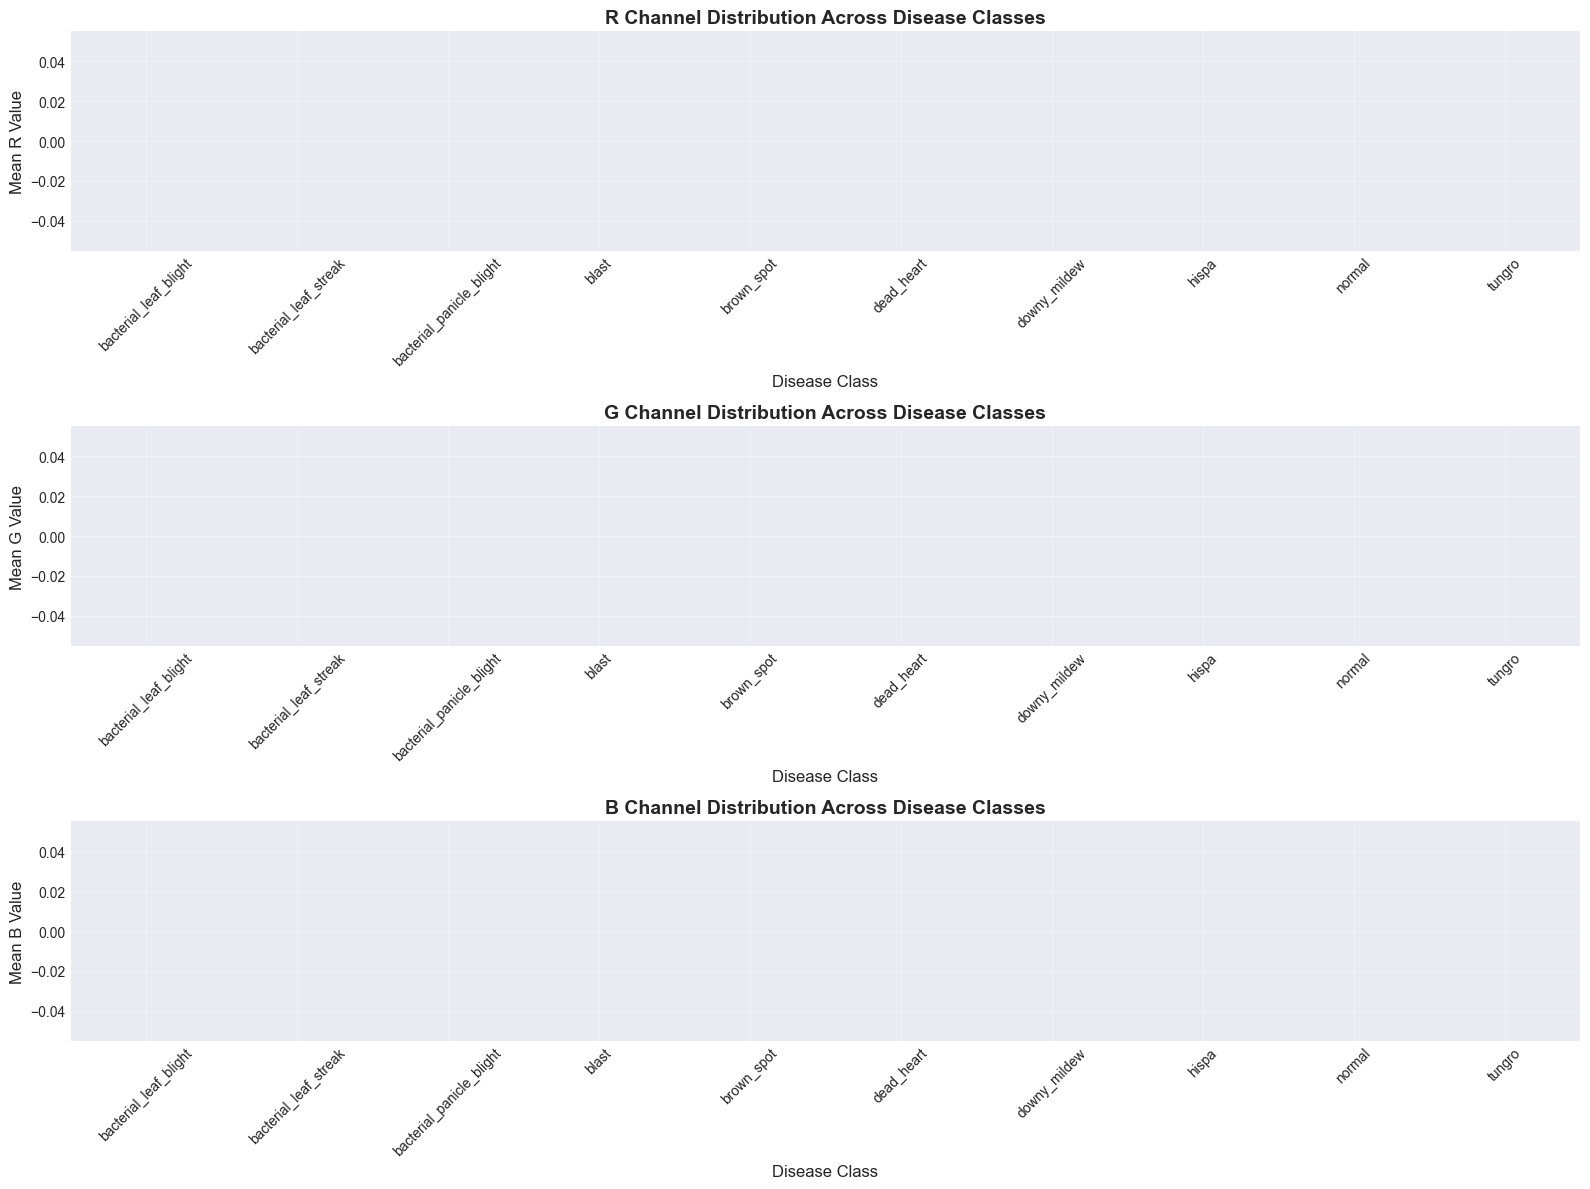

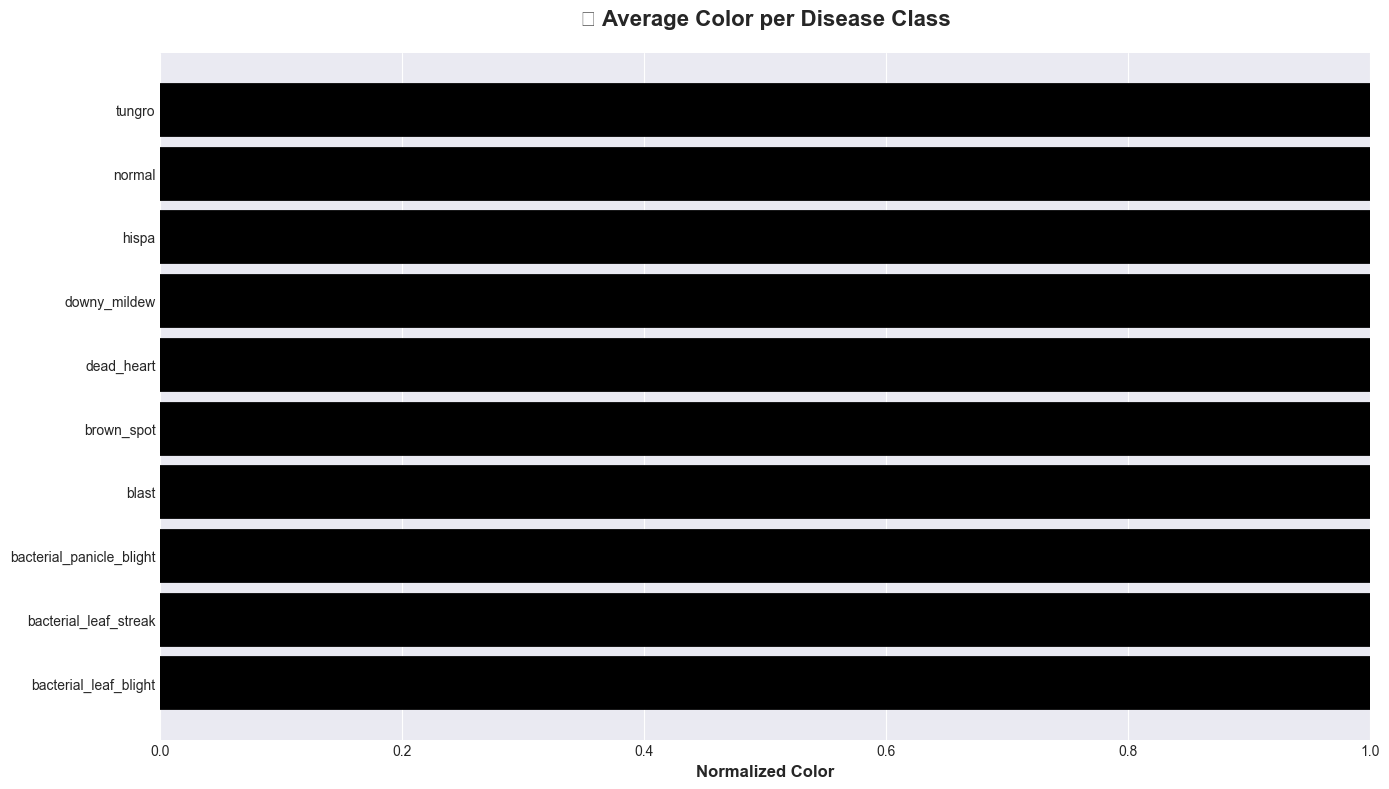


📊 Color Distribution Interpretation:
Color patterns can help distinguish diseases:
  • bacterial_leaf_blight: R=nan, G=nan, B=nan
  • bacterial_leaf_streak: R=nan, G=nan, B=nan
  • bacterial_panicle_blight: R=nan, G=nan, B=nan
  • blast: R=nan, G=nan, B=nan
  • brown_spot: R=nan, G=nan, B=nan
  • dead_heart: R=nan, G=nan, B=nan
  • downy_mildew: R=nan, G=nan, B=nan
  • hispa: R=nan, G=nan, B=nan
  • normal: R=nan, G=nan, B=nan
  • tungro: R=nan, G=nan, B=nan


In [29]:
# 🎨 Visualization 11: Color Distribution Analysis
def analyze_color_distribution(df, sample_size=50):
    """
    Analyze color distribution across disease classes
    """
    print("=" * 80)
    print("🎨 ANALYZING COLOR DISTRIBUTION")
    print("=" * 80)
    
    classes = df['label'].unique()
    color_stats = {cls: {'R': [], 'G': [], 'B': []} for cls in classes}
    
    for disease_class in tqdm(classes, desc="Analyzing colors"):
        class_samples = df[df['label'] == disease_class].sample(
            n=min(sample_size, len(df[df['label'] == disease_class])), 
            random_state=SEED
        )
        
        for idx, row in class_samples.iterrows():
            img_path = TRAIN_DIR / disease_class / row['image_id']
            img = cv2.imread(str(img_path))
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                color_stats[disease_class]['R'].append(img[:, :, 0].mean())
                color_stats[disease_class]['G'].append(img[:, :, 1].mean())
                color_stats[disease_class]['B'].append(img[:, :, 2].mean())
    
    # Create visualization
    fig, axes = plt.subplots(3, 1, figsize=(16, 12))
    
    channels = ['R', 'G', 'B']
    colors = ['red', 'green', 'blue']
    
    for i, (channel, color) in enumerate(zip(channels, colors)):
        data = [color_stats[cls][channel] for cls in classes]
        bp = axes[i].boxplot(data, labels=classes, patch_artist=True,
                             boxprops=dict(facecolor=color, alpha=0.5),
                             medianprops=dict(color='black', linewidth=2))
        axes[i].set_title(f'{channel} Channel Distribution Across Disease Classes', 
                         fontsize=14, fontweight='bold')
        axes[i].set_xlabel('Disease Class', fontsize=12)
        axes[i].set_ylabel(f'Mean {channel} Value', fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('color_distribution_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Average color per class
    fig, ax = plt.subplots(1, 1, figsize=(14, 8))
    
    avg_colors = []
    for cls in classes:
        r = np.mean(color_stats[cls]['R']) / 255
        g = np.mean(color_stats[cls]['G']) / 255
        b = np.mean(color_stats[cls]['B']) / 255
        avg_colors.append([r, g, b])
    
    # Create color bars
    x_pos = np.arange(len(classes))
    for i, (cls, color) in enumerate(zip(classes, avg_colors)):
        ax.barh(i, 1, color=color, edgecolor='black', linewidth=2)
        ax.text(0.5, i, cls, ha='center', va='center', fontsize=12, fontweight='bold',
                color='white' if sum(color) < 1.5 else 'black')
    
    ax.set_yticks(x_pos)
    ax.set_yticklabels(classes)
    ax.set_xlabel('Normalized Color', fontsize=12, fontweight='bold')
    ax.set_title('🎨 Average Color per Disease Class', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlim(0, 1)
    
    plt.tight_layout()
    plt.savefig('average_color_per_class.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n📊 Color Distribution Interpretation:")
    print("=" * 80)
    print("Color patterns can help distinguish diseases:")
    for cls in classes:
        r_avg = np.mean(color_stats[cls]['R'])
        g_avg = np.mean(color_stats[cls]['G'])
        b_avg = np.mean(color_stats[cls]['B'])
        print(f"  • {cls}: R={r_avg:.1f}, G={g_avg:.1f}, B={b_avg:.1f}")

analyze_color_distribution(train_df, sample_size=30)

In [31]:
from pathlib import Path

TRAIN_DIR = Path("train_images")


🔄 DATA AUGMENTATION PREVIEW


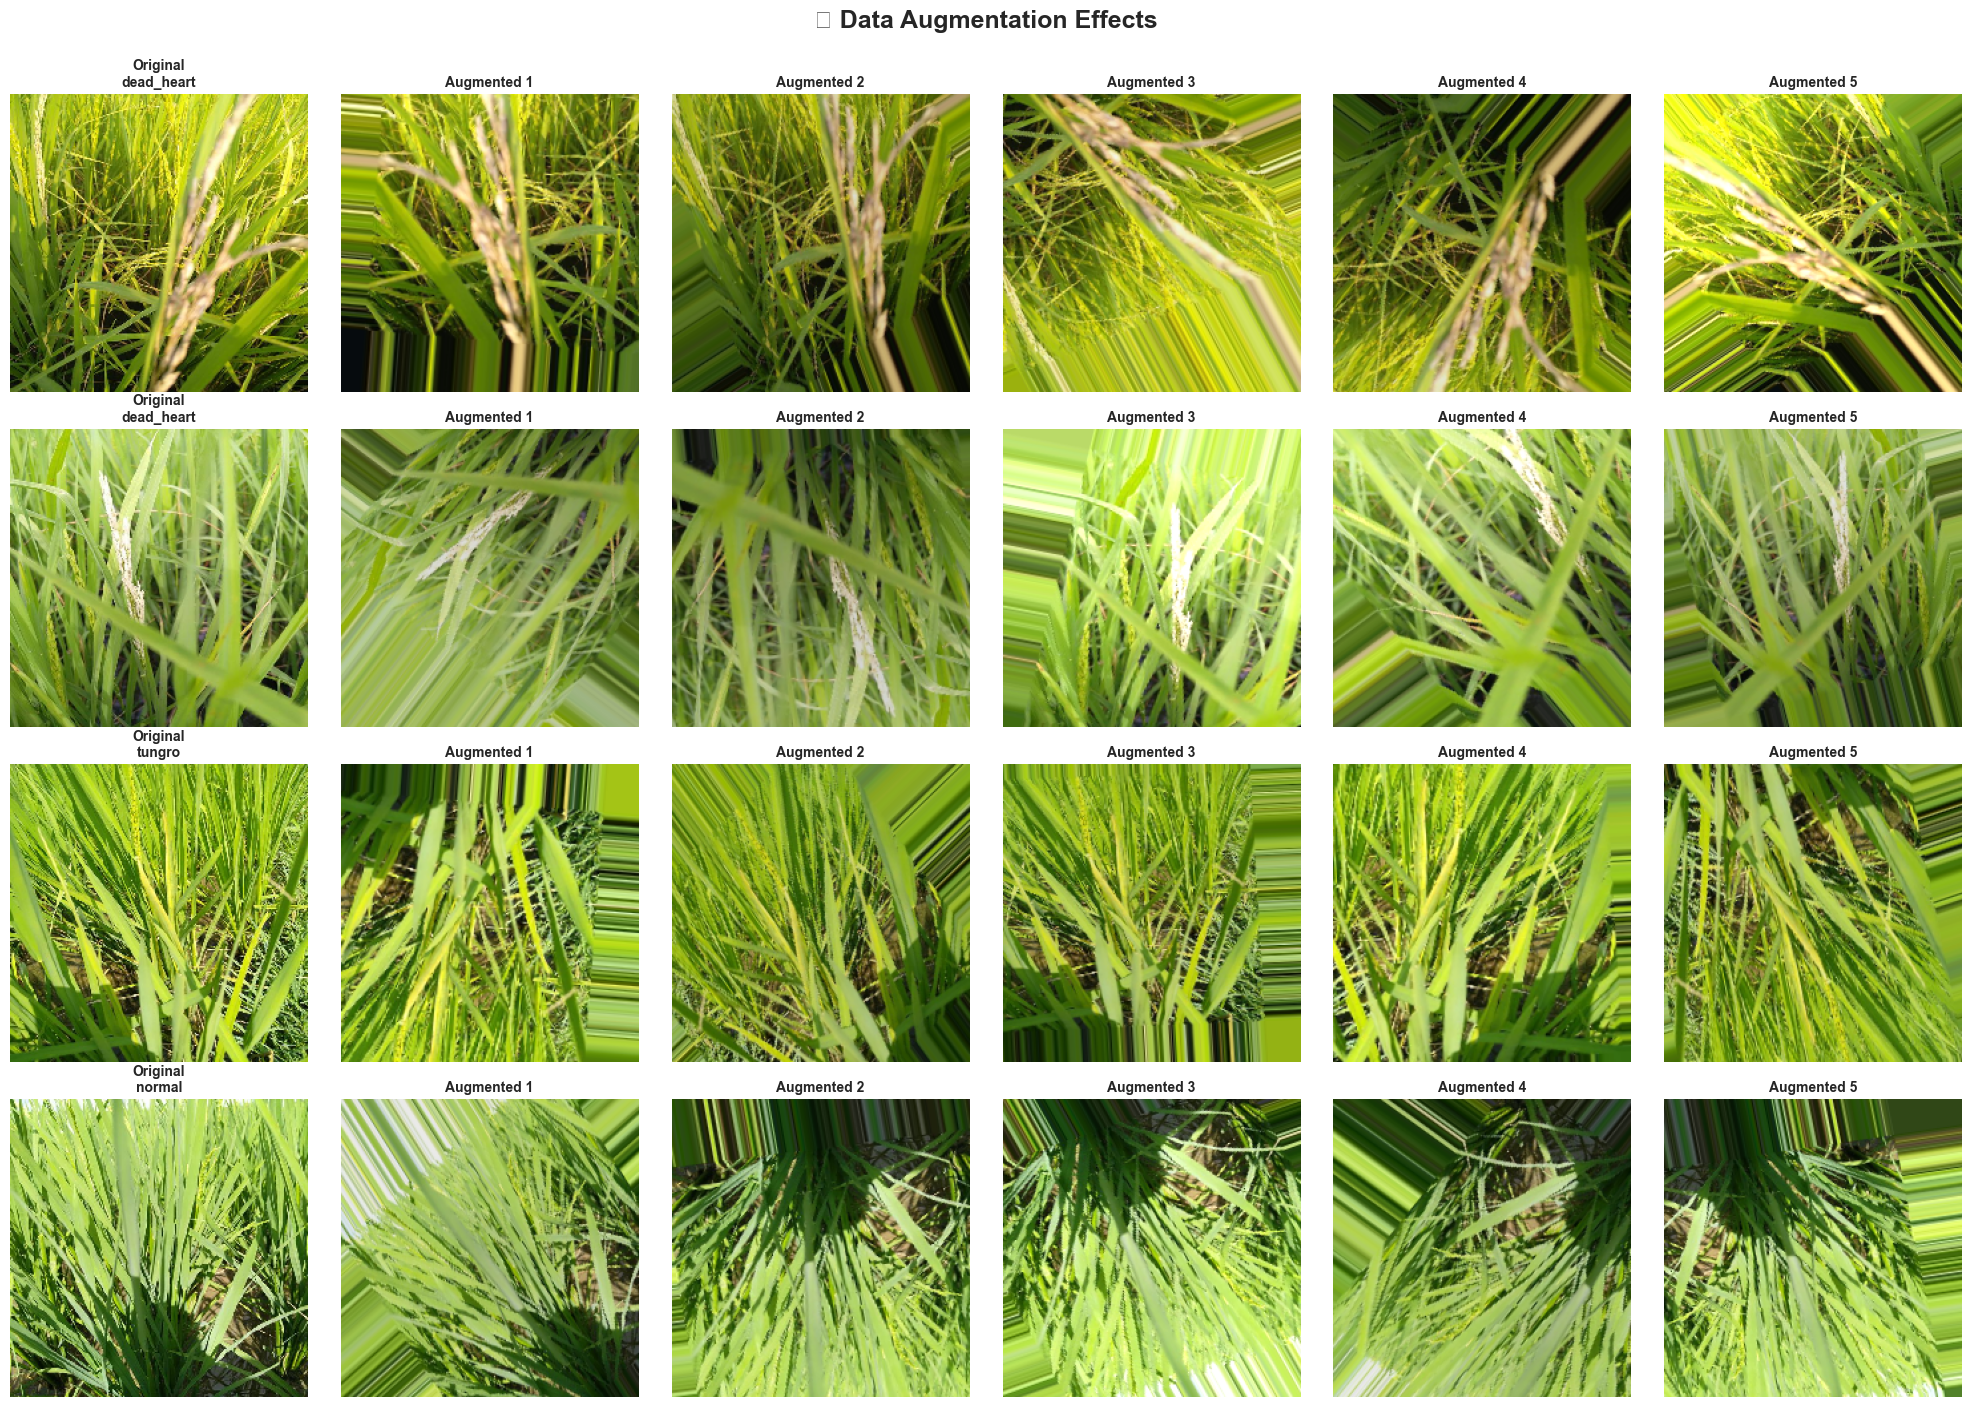


📊 Augmentation Interpretation:
Data augmentation helps by:
  • Increasing dataset size artificially
  • Improving model generalization
  • Reducing overfitting
  • Creating variations of existing images

🔄 Augmentation techniques applied:
  • Rotation (±40 degrees)
  • Width/Height shifts (20%)
  • Shearing (20%)
  • Zooming (20%)
  • Horizontal & Vertical flips
  • Brightness adjustment (80%-120%)


In [32]:
# 🎨 Visualization 12: Image Augmentation Preview
def visualize_augmentation(df, num_images=3):
    """
    Visualize the effect of data augmentation techniques
    """
    print("=" * 80)
    print("🔄 DATA AUGMENTATION PREVIEW")
    print("=" * 80)
    
    # Define augmentation
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest',
        brightness_range=[0.8, 1.2]
    )
    
    fig, axes = plt.subplots(num_images, 6, figsize=(20, num_images*3.5))
    
    sample_images = df.sample(n=num_images, random_state=SEED)
    
    for i, (idx, row) in enumerate(sample_images.iterrows()):
        img_path = TRAIN_DIR / row['label'] / row['image_id']
        img = load_img(str(img_path), target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = img_array.reshape((1,) + img_array.shape)
        
        # Original image
        ax = axes[i, 0] if num_images > 1 else axes[0]
        ax.imshow(img)
        ax.set_title(f'Original\n{row["label"]}', fontsize=10, fontweight='bold')
        ax.axis('off')
        
        # Augmented images
        aug_iter = datagen.flow(img_array, batch_size=1)
        for j in range(1, 6):
            augmented_img = next(aug_iter)[0].astype('uint8')
            ax = axes[i, j] if num_images > 1 else axes[j]
            ax.imshow(augmented_img)
            ax.set_title(f'Augmented {j}', fontsize=10, fontweight='bold')
            ax.axis('off')
    
    plt.suptitle('🔄 Data Augmentation Effects', fontsize=18, fontweight='bold', y=1.002)
    plt.tight_layout()
    plt.savefig('augmentation_preview.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n📊 Augmentation Interpretation:")
    print("=" * 80)
    print("Data augmentation helps by:")
    print("  • Increasing dataset size artificially")
    print("  • Improving model generalization")
    print("  • Reducing overfitting")
    print("  • Creating variations of existing images")
    print("\n🔄 Augmentation techniques applied:")
    print("  • Rotation (±40 degrees)")
    print("  • Width/Height shifts (20%)")
    print("  • Shearing (20%)")
    print("  • Zooming (20%)")
    print("  • Horizontal & Vertical flips")
    print("  • Brightness adjustment (80%-120%)")

visualize_augmentation(train_df, num_images=4)

<a id='5'></a>

## 5. 🔧 Data Preprocessing & Augmentation

In [33]:
# 🔧 Data Preparation
print("=" * 80)
print("🔧 DATA PREPARATION FOR MODEL TRAINING")
print("=" * 80)

# Define image parameters
IMG_SIZE = 224  # Standard size for transfer learning models
BATCH_SIZE = 32
EPOCHS = 50
LEARNING_RATE = 0.001

# Get class names
class_names = sorted(train_df['label'].unique())
num_classes = len(class_names)

print(f"\n📌 Image Size: {IMG_SIZE}x{IMG_SIZE}")
print(f"📌 Batch Size: {BATCH_SIZE}")
print(f"📌 Number of Classes: {num_classes}")
print(f"📌 Classes: {class_names}")

# Create class to index mapping
class_to_idx = {cls_name: idx for idx, cls_name in enumerate(class_names)}
idx_to_class = {idx: cls_name for cls_name, idx in class_to_idx.items()}

print(f"\n🗺️ Class Mapping:")
for cls, idx in class_to_idx.items():
    print(f"  {idx}: {cls}")

🔧 DATA PREPARATION FOR MODEL TRAINING

📌 Image Size: 224x224
📌 Batch Size: 32
📌 Number of Classes: 10
📌 Classes: ['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']

🗺️ Class Mapping:
  0: bacterial_leaf_blight
  1: bacterial_leaf_streak
  2: bacterial_panicle_blight
  3: blast
  4: brown_spot
  5: dead_heart
  6: downy_mildew
  7: hispa
  8: normal
  9: tungro


In [34]:
# 🔄 Create Train-Validation Split (Stratified)
print("\n" + "=" * 80)
print("🔀 CREATING TRAIN-VALIDATION SPLIT")
print("=" * 80)

from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(
    train_df,
    test_size=0.15,
    stratify=train_df['label'],
    random_state=SEED
)

print(f"\n📊 Split Statistics:")
print(f"  • Total Images: {len(train_df)}")
print(f"  • Training Images: {len(train_data)} ({len(train_data)/len(train_df)*100:.1f}%)")
print(f"  • Validation Images: {len(val_data)} ({len(val_data)/len(train_df)*100:.1f}%)")

# Verify stratification
print(f"\n✅ Class Distribution Verification:")
print("\nTraining Set:")
print(train_data['label'].value_counts().sort_index())
print("\nValidation Set:")
print(val_data['label'].value_counts().sort_index())

# Reset indices
train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)


🔀 CREATING TRAIN-VALIDATION SPLIT

📊 Split Statistics:
  • Total Images: 10407
  • Training Images: 8845 (85.0%)
  • Validation Images: 1562 (15.0%)

✅ Class Distribution Verification:

Training Set:
label
bacterial_leaf_blight        407
bacterial_leaf_streak        323
bacterial_panicle_blight     286
blast                       1477
brown_spot                   820
dead_heart                  1226
downy_mildew                 527
hispa                       1355
normal                      1499
tungro                       925
Name: count, dtype: int64

Validation Set:
label
bacterial_leaf_blight        72
bacterial_leaf_streak        57
bacterial_panicle_blight     51
blast                       261
brown_spot                  145
dead_heart                  216
downy_mildew                 93
hispa                       239
normal                      265
tungro                      163
Name: count, dtype: int64


In [35]:
# 🎨 Advanced Data Augmentation Strategy
print("\n" + "=" * 80)
print("🎨 DEFINING DATA AUGMENTATION STRATEGIES")
print("=" * 80)

# Training data augmentation (aggressive)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    channel_shift_range=0.1
)

# Validation data (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)

# Test data (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

print("✅ Training Augmentation:")
print("  • Rescaling: 1/255")
print("  • Rotation: ±40°")
print("  • Width/Height Shift: 20%")
print("  • Shear: 20%")
print("  • Zoom: 20%")
print("  • Horizontal Flip: Yes")
print("  • Vertical Flip: Yes")
print("  • Brightness: 80%-120%")
print("  • Channel Shift: 10%")

print("\n✅ Validation/Test Augmentation:")
print("  • Rescaling only: 1/255")
print("  • No other transformations (to evaluate true performance)")


🎨 DEFINING DATA AUGMENTATION STRATEGIES
✅ Training Augmentation:
  • Rescaling: 1/255
  • Rotation: ±40°
  • Width/Height Shift: 20%
  • Shear: 20%
  • Zoom: 20%
  • Horizontal Flip: Yes
  • Vertical Flip: Yes
  • Brightness: 80%-120%
  • Channel Shift: 10%

✅ Validation/Test Augmentation:
  • Rescaling only: 1/255
  • No other transformations (to evaluate true performance)


In [36]:
# 📁 Create Data Generators
print("\n" + "=" * 80)
print("📁 CREATING DATA GENERATORS")
print("=" * 80)

# Training generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=TRAIN_DIR,
    x_col='image_id',
    y_col='label',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=SEED
)

# Validation generator
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    directory=TRAIN_DIR,
    x_col='image_id',
    y_col='label',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    seed=SEED
)

print(f"\n✅ Training Generator:")
print(f"  • Total batches: {len(train_generator)}")
print(f"  • Images per batch: {BATCH_SIZE}")
print(f"  • Total images: {train_generator.samples}")

print(f"\n✅ Validation Generator:")
print(f"  • Total batches: {len(val_generator)}")
print(f"  • Images per batch: {BATCH_SIZE}")
print(f"  • Total images: {val_generator.samples}")


📁 CREATING DATA GENERATORS
Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.

✅ Training Generator:
  • Total batches: 0
  • Images per batch: 32
  • Total images: 0

✅ Validation Generator:
  • Total batches: 0
  • Images per batch: 32
  • Total images: 0



🎯 VISUALIZING GENERATOR OUTPUT


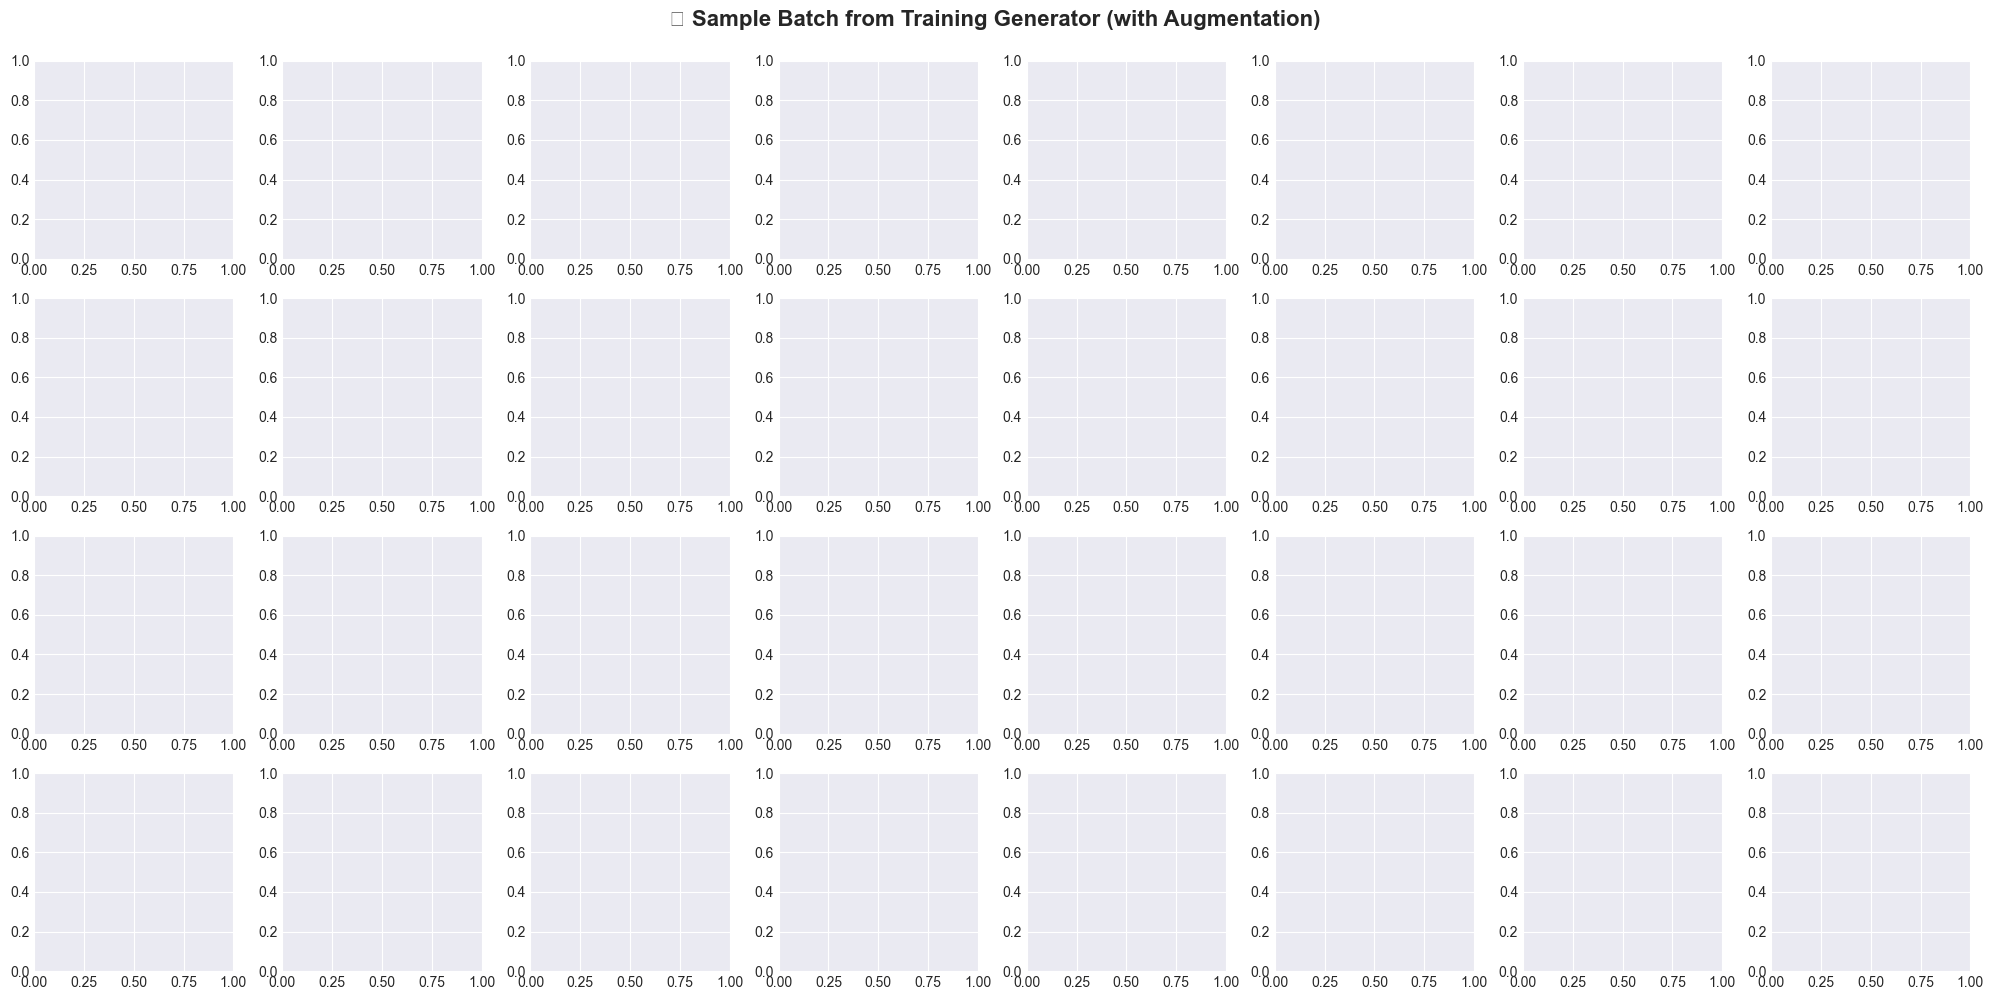


📊 Batch Shape:
  • Images: (0, 224, 224, 3)
  • Labels: (0, 0)

✅ Data generators are working correctly!


In [37]:
# 🎯 Visualize Generator Output
print("\n" + "=" * 80)
print("🎯 VISUALIZING GENERATOR OUTPUT")
print("=" * 80)

# Get one batch
sample_batch_images, sample_batch_labels = next(train_generator)

# Visualize
fig, axes = plt.subplots(4, 8, figsize=(20, 10))
axes = axes.ravel()

for i in range(min(32, len(sample_batch_images))):
    axes[i].imshow(sample_batch_images[i])
    label_idx = np.argmax(sample_batch_labels[i])
    label_name = idx_to_class[label_idx]
    axes[i].set_title(f'{label_name}', fontsize=9, fontweight='bold')
    axes[i].axis('off')

plt.suptitle('🎯 Sample Batch from Training Generator (with Augmentation)', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('generator_output_sample.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Batch Shape:")
print(f"  • Images: {sample_batch_images.shape}")
print(f"  • Labels: {sample_batch_labels.shape}")
print(f"\n✅ Data generators are working correctly!")

<a id='6'></a>

## 6. 🏗️ CNN Architecture Development

In [38]:
# 🏗️ Build Custom CNN Model
print("=" * 80)
print("🏗️ BUILDING CUSTOM CNN ARCHITECTURE")
print("=" * 80)

def create_custom_cnn(input_shape=(IMG_SIZE, IMG_SIZE, 3), num_classes=num_classes):
    """
    Create a custom CNN architecture for paddy disease classification
    
    Architecture:
    - Multiple convolutional blocks
    - Batch normalization
    - Dropout for regularization
    - Global average pooling
    - Dense layers with dropout
    """
    
    model = Sequential([
        # Input layer
        Input(shape=input_shape),
        
        # Block 1
        Conv2D(32, (3, 3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(32, (3, 3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        # Block 2
        Conv2D(64, (3, 3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(64, (3, 3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        # Block 3
        Conv2D(128, (3, 3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(128, (3, 3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        # Block 4
        Conv2D(256, (3, 3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(256, (3, 3), padding='same'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        # Global pooling and dense layers
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ], name='Custom_CNN')
    
    return model

# Create model
custom_cnn = create_custom_cnn()

# Display architecture
print("\n📋 Model Architecture:")
custom_cnn.summary()

# Visualize model
plot_model(custom_cnn, to_file='custom_cnn_architecture.png', 
           show_shapes=True, show_layer_names=True, dpi=150)

print(f"\n📊 Model Statistics:")
print(f"  • Total Parameters: {custom_cnn.count_params():,}")
print(f"  • Trainable Parameters: {sum([tf.size(w).numpy() for w in custom_cnn.trainable_weights]):,}")
print(f"  • Number of Layers: {len(custom_cnn.layers)}")

🏗️ BUILDING CUSTOM CNN ARCHITECTURE

📋 Model Architecture:


Model: "Custom_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 56, 56, 128)    │             

 Total params: 1,444,650 (5.51 MB)

 Trainable params: 1,441,194 (5.50 MB)

 Non-trainable params: 3,456 (13.50 KB)

You must install pydot (`pip install pydot`) for `plot_model` to work.

📊 Model Statistics:
  • Total Parameters: 1,444,650
  • Trainable Parameters: 1,441,194
  • Number of Layers: 40


In [39]:
# 🎯 Compile Custom CNN
print("\n" + "=" * 80)
print("🎯 COMPILING CUSTOM CNN MODEL")
print("=" * 80)

# Calculate class weights for imbalanced classes
from sklearn.utils.class_weight import compute_class_weight

class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_data['label']),
    y=train_data['label']
)

class_weights = {i: weight for i, weight in enumerate(class_weights_array)}

print("⚖️ Class Weights (to handle imbalance):")
for cls_idx, weight in class_weights.items():
    print(f"  • {idx_to_class[cls_idx]}: {weight:.3f}")

# Compile model
custom_cnn.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=3, name='top_3_accuracy')]
)

print("\n✅ Model Compiled Successfully!")
print(f"  • Optimizer: Adam (lr={LEARNING_RATE})")
print(f"  • Loss: Categorical Crossentropy")
print(f"  • Metrics: Accuracy, Top-3 Accuracy")


🎯 COMPILING CUSTOM CNN MODEL
⚖️ Class Weights (to handle imbalance):
  • bacterial_leaf_blight: 2.173
  • bacterial_leaf_streak: 2.738
  • bacterial_panicle_blight: 3.093
  • blast: 0.599
  • brown_spot: 1.079
  • dead_heart: 0.721
  • downy_mildew: 1.678
  • hispa: 0.653
  • normal: 0.590
  • tungro: 0.956

✅ Model Compiled Successfully!
  • Optimizer: Adam (lr=0.001)
  • Loss: Categorical Crossentropy
  • Metrics: Accuracy, Top-3 Accuracy


In [41]:
from pathlib import Path

TRAIN_DIR = Path("train_images")


In [42]:
# 📞 Define Callbacks
print("\n" + "=" * 80)
print("📞 SETTING UP TRAINING CALLBACKS")
print("=" * 80)

# Create callbacks directory
callbacks_dir = OUTPUT_DIR / 'callbacks'
callbacks_dir.mkdir(exist_ok=True)

# ModelCheckpoint - Save best model
checkpoint = ModelCheckpoint(
    filepath=str(callbacks_dir / 'best_custom_cnn.h5'),
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# EarlyStopping - Stop if no improvement
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

# ReduceLROnPlateau - Reduce learning rate when plateaued
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    mode='min',
    verbose=1
)

# CSVLogger - Log training history
csv_logger = CSVLogger(
    filename=str(callbacks_dir / 'training_history.csv'),
    append=False
)

callbacks_list = [checkpoint, early_stop, reduce_lr, csv_logger]

print("✅ Callbacks Configured:")
print("  • ModelCheckpoint: Save best model based on val_accuracy")
print("  • EarlyStopping: Stop if no improvement for 10 epochs")
print("  • ReduceLROnPlateau: Reduce LR by 0.5 if no improvement for 5 epochs")
print("  • CSVLogger: Log training metrics to CSV")


📞 SETTING UP TRAINING CALLBACKS


FileNotFoundError: [WinError 3] The system cannot find the path specified: '\\kaggle\\working\\callbacks'

<a id='7'></a>

 ## 7. 🚀 Transfer Learning Models

In [45]:
# 🚀 Transfer Learning with EfficientNetB3
print("=" * 80)
print("🚀 BUILDING TRANSFER LEARNING MODEL - EfficientNetB3")
print("=" * 80)

def create_efficientnet_model(input_shape=(IMG_SIZE, IMG_SIZE, 3), num_classes=num_classes):
    """
    Create transfer learning model using EfficientNetB3
    
    Features:
    - Pre-trained on ImageNet
    - Fine-tuning capability
    - Global average pooling
    - Dense layers with dropout
    """
    
    # Load base model
    base_model = EfficientNetB3(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape
    )
    
    # Freeze base model layers initially
    base_model.trainable = False
    
    # Create new model
    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs, outputs, name='EfficientNetB3_Transfer')
    
    return model, base_model

# Create model
efficientnet_model, efficientnet_base = create_efficientnet_model()

print("\n📋 EfficientNetB3 Model Architecture:")
efficientnet_model.summary()

print(f"\n📊 Model Statistics:")
print(f"  • Total Parameters: {efficientnet_model.count_params():,}")
print(f"  • Trainable Parameters: {sum([tf.size(w).numpy() for w in efficientnet_model.trainable_weights]):,}")
print(f"  • Non-Trainable Parameters: {sum([tf.size(w).numpy() for w in efficientnet_model.non_trainable_weights]):,}")
print(f"  • Base Model Layers: {len(efficientnet_base.layers)}")

🚀 BUILDING TRANSFER LEARNING MODEL - EfficientNetB3


ValueError: Shape mismatch in layer #1 (named stem_conv)for weight stem_conv/kernel. Weight expects shape (3, 3, 1, 40). Received saved weight with shape (3, 3, 3, 40)

In [44]:
# 🎯 Compile EfficientNet Model
print("\n" + "=" * 80)
print("🎯 COMPILING EfficientNetB3 MODEL")
print("=" * 80)

efficientnet_model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=3, name='top_3_accuracy')]
)

print("✅ EfficientNetB3 Model Compiled Successfully!")
print(f"  • Base Model: Frozen (will be unfrozen later for fine-tuning)")
print(f"  • Optimizer: Adam (lr={LEARNING_RATE})")
print(f"  • Loss: Categorical Crossentropy")
print(f"  • Metrics: Accuracy, Top-3 Accuracy")


🎯 COMPILING EfficientNetB3 MODEL


NameError: name 'efficientnet_model' is not defined

In [46]:
# 📞 Setup Callbacks for EfficientNet
efficientnet_checkpoint = ModelCheckpoint(
    filepath=str(callbacks_dir / 'best_efficientnet.h5'),
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

efficientnet_callbacks = [efficientnet_checkpoint, early_stop, reduce_lr, 
                          CSVLogger(str(callbacks_dir / 'efficientnet_history.csv'))]

print("✅ Callbacks configured for EfficientNetB3")

NameError: name 'early_stop' is not defined

In [47]:
# 🏋️ Train EfficientNet Model (Phase 1: Frozen Base)
print("\n" + "=" * 80)
print("🏋️ TRAINING EfficientNetB3 - PHASE 1 (Frozen Base)")
print("=" * 80)

EPOCHS_PHASE1 = 20

print(f"Training for {EPOCHS_PHASE1} epochs with frozen base model...")
print("This allows the new classification head to learn before fine-tuning.")

history_phase1 = efficientnet_model.fit(
    train_generator,
    epochs=EPOCHS_PHASE1,
    validation_data=val_generator,
    callbacks=efficientnet_callbacks,
    class_weight=class_weights,
    verbose=1
)

print("\n✅ Phase 1 Training Completed!")


🏋️ TRAINING EfficientNetB3 - PHASE 1 (Frozen Base)
Training for 20 epochs with frozen base model...
This allows the new classification head to learn before fine-tuning.


NameError: name 'efficientnet_model' is not defined

In [ ]:
# 📊 Visualize Phase 1 Training History
print("\n" + "=" * 80)
print("📊 PHASE 1 TRAINING HISTORY VISUALIZATION")
print("=" * 80)

def plot_training_history(history, phase_name="Training"):
    """
    Plot training and validation metrics
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Accuracy
    axes[0, 0].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
    axes[0, 0].plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
    axes[0, 0].set_title(f'📈 Model Accuracy - {phase_name}', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Epoch', fontsize=12)
    axes[0, 0].set_ylabel('Accuracy', fontsize=12)
    axes[0, 0].legend(loc='lower right')
    axes[0, 0].grid(alpha=0.3)
    
    # Loss
    axes[0, 1].plot(history.history['loss'], label='Train Loss', linewidth=2)
    axes[0, 1].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
    axes[0, 1].set_title(f'📉 Model Loss - {phase_name}', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Epoch', fontsize=12)
    axes[0, 1].set_ylabel('Loss', fontsize=12)
    axes[0, 1].legend(loc='upper right')
    axes[0, 1].grid(alpha=0.3)
    
    # Top-3 Accuracy
    axes[1, 0].plot(history.history['top_3_accuracy'], label='Train Top-3 Acc', linewidth=2)
    axes[1, 0].plot(history.history['val_top_3_accuracy'], label='Val Top-3 Acc', linewidth=2)
    axes[1, 0].set_title(f'📊 Top-3 Accuracy - {phase_name}', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Epoch', fontsize=12)
    axes[1, 0].set_ylabel('Top-3 Accuracy', fontsize=12)
    axes[1, 0].legend(loc='lower right')
    axes[1, 0].grid(alpha=0.3)
    
    # Learning rate (if available)
    if 'lr' in history.history:
        axes[1, 1].plot(history.history['lr'], label='Learning Rate', linewidth=2, color='orange')
        axes[1, 1].set_title(f'📉 Learning Rate - {phase_name}', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Epoch', fontsize=12)
        axes[1, 1].set_ylabel('Learning Rate', fontsize=12)
        axes[1, 1].set_yscale('log')
        axes[1, 1].legend()
        axes[1, 1].grid(alpha=0.3)
    else:
        # Overfitting analysis
        train_loss = np.array(history.history['loss'])
        val_loss = np.array(history.history['val_loss'])
        gap = val_loss - train_loss
        axes[1, 1].plot(gap, label='Val-Train Loss Gap', linewidth=2, color='red')
        axes[1, 1].axhline(y=0, color='black', linestyle='--', linewidth=1)
        axes[1, 1].set_title(f'⚠️ Overfitting Analysis - {phase_name}', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Epoch', fontsize=12)
        axes[1, 1].set_ylabel('Loss Gap', fontsize=12)
        axes[1, 1].legend()
        axes[1, 1].grid(alpha=0.3)
        axes[1, 1].fill_between(range(len(gap)), 0, gap, where=(gap > 0), 
                                alpha=0.3, color='red', label='Overfitting Region')
    
    plt.tight_layout()
    plt.savefig(f'{phase_name.lower().replace(" ", "_")}_history.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print summary
    print(f"\n📊 {phase_name} Summary:")
    print("=" * 80)
    print(f"Best Validation Accuracy: {max(history.history['val_accuracy']):.4f}")
    print(f"Best Validation Loss: {min(history.history['val_loss']):.4f}")
    print(f"Best Train Accuracy: {max(history.history['accuracy']):.4f}")
    print(f"Best Train Loss: {min(history.history['loss']):.4f}")
    print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
    print(f"Final Train Accuracy: {history.history['accuracy'][-1]:.4f}")
    
    # Overfitting check
    final_gap = history.history['val_loss'][-1] - history.history['loss'][-1]
    if final_gap > 0.5:
        print(f"\n⚠️ Warning: Significant overfitting detected (gap: {final_gap:.3f})")
    elif final_gap > 0.2:
        print(f"\n⚡ Moderate overfitting (gap: {final_gap:.3f})")
    else:
        print(f"\n✅ Good generalization (gap: {final_gap:.3f})")

plot_training_history(history_phase1, "Phase 1 - Frozen Base")

In [ ]:
# 🔓 Unfreeze Base Model for Fine-tuning (Phase 2)
print("\n" + "=" * 80)
print("🔓 PHASE 2: FINE-TUNING (Unfreezing Base Model)")
print("=" * 80)

# Unfreeze the base model
efficientnet_base.trainable = True

# Fine-tune from a certain layer (last 50 layers)
fine_tune_at = len(efficientnet_base.layers) - 50

# Freeze all layers before fine_tune_at
for layer in efficientnet_base.layers[:fine_tune_at]:
    layer.trainable = False

print(f"📊 Fine-tuning Statistics:")
print(f"  • Total Base Layers: {len(efficientnet_base.layers)}")
print(f"  • Frozen Layers: {fine_tune_at}")
print(f"  • Trainable Layers: {len(efficientnet_base.layers) - fine_tune_at}")

# Recompile with lower learning rate
efficientnet_model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE/10),  # Lower learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=3, name='top_3_accuracy')]
)

print(f"\n✅ Model recompiled for fine-tuning")
print(f"  • New Learning Rate: {LEARNING_RATE/10} (10x lower)")
print(f"  • Trainable Parameters: {sum([tf.size(w).numpy() for w in efficientnet_model.trainable_weights]):,}")

In [ ]:
# 🏋️ Train Phase 2 - Fine-tuning
print("\n" + "=" * 80)
print("🏋️ TRAINING PHASE 2 - FINE-TUNING")
print("=" * 80)

EPOCHS_PHASE2 = 30

print(f"Fine-tuning for {EPOCHS_PHASE2} additional epochs...")
print("This allows the model to adapt ImageNet features to paddy disease classification.")

# Update checkpoint
efficientnet_checkpoint_phase2 = ModelCheckpoint(
    filepath=str(callbacks_dir / 'best_efficientnet_finetuned.h5'),
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

efficientnet_callbacks_phase2 = [
    efficientnet_checkpoint_phase2, 
    early_stop, 
    reduce_lr,
    CSVLogger(str(callbacks_dir / 'efficientnet_phase2_history.csv'))
]

history_phase2 = efficientnet_model.fit(
    train_generator,
    epochs=EPOCHS_PHASE2,
    validation_data=val_generator,
    callbacks=efficientnet_callbacks_phase2,
    class_weight=class_weights,
    verbose=1
)

print("\n✅ Phase 2 Fine-tuning Completed!")

In [ ]:
# 📊 Visualize Phase 2 Training History
plot_training_history(history_phase2, "Phase 2 - Fine-Tuning")

In [ ]:
# 📈 Combined Training History
print("\n" + "=" * 80)
print("📈 COMBINED TRAINING HISTORY (Phase 1 + Phase 2)")
print("=" * 80)

# Combine histories
combined_history = {
    'accuracy': history_phase1.history['accuracy'] + history_phase2.history['accuracy'],
    'val_accuracy': history_phase1.history['val_accuracy'] + history_phase2.history['val_accuracy'],
    'loss': history_phase1.history['loss'] + history_phase2.history['loss'],
    'val_loss': history_phase1.history['val_loss'] + history_phase2.history['val_loss'],
    'top_3_accuracy': history_phase1.history['top_3_accuracy'] + history_phase2.history['top_3_accuracy'],
    'val_top_3_accuracy': history_phase1.history['val_top_3_accuracy'] + history_phase2.history['val_top_3_accuracy']
}

# Create a mock history object
class CombinedHistory:
    def __init__(self, history_dict):
        self.history = history_dict

combined_hist_obj = CombinedHistory(combined_history)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Accuracy
axes[0].plot(combined_history['accuracy'], label='Train Accuracy', linewidth=2)
axes[0].plot(combined_history['val_accuracy'], label='Val Accuracy', linewidth=2)
axes[0].axvline(x=EPOCHS_PHASE1, color='red', linestyle='--', linewidth=2, label='Fine-tuning Starts')
axes[0].set_title('📈 Complete Training History - Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Loss
axes[1].plot(combined_history['loss'], label='Train Loss', linewidth=2)
axes[1].plot(combined_history['val_loss'], label='Val Loss', linewidth=2)
axes[1].axvline(x=EPOCHS_PHASE1, color='red', linestyle='--', linewidth=2, label='Fine-tuning Starts')
axes[1].set_title('📉 Complete Training History - Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('combined_training_history.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📊 Complete Training Summary:")
print("=" * 80)
print(f"Total Epochs: {EPOCHS_PHASE1 + len(history_phase2.history['accuracy'])}")
print(f"Phase 1 Epochs: {EPOCHS_PHASE1}")
print(f"Phase 2 Epochs: {len(history_phase2.history['accuracy'])}")
print(f"\nBest Overall Validation Accuracy: {max(combined_history['val_accuracy']):.4f}")
print(f"Best Overall Validation Loss: {min(combined_history['val_loss']):.4f}")
print(f"Final Validation Accuracy: {combined_history['val_accuracy'][-1]:.4f}")
print(f"Final Train Accuracy: {combined_history['accuracy'][-1]:.4f}")

<a id='8'></a>

## 8. 🎓 Model Training & Optimization

In [ ]:
# 🔬 Alternative Model: EfficientNetB7 (for even better performance)
print("=" * 80)
print("🔬 BUILDING HIGH-CAPACITY MODEL - EfficientNetB7")
print("=" * 80)

# Note: EfficientNetB7 requires larger image size (600x600) for optimal performance
# We'll use 384x384 as a compromise

IMG_SIZE_B7 = 384
BATCH_SIZE_B7 = 16  # Smaller batch size due to larger images

print(f"📌 Image Size for B7: {IMG_SIZE_B7}x{IMG_SIZE_B7}")
print(f"📌 Batch Size for B7: {BATCH_SIZE_B7}")

# Create new generators for B7
train_generator_b7 = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=TRAIN_DIR,
    x_col='image_id',
    y_col='label',
    target_size=(IMG_SIZE_B7, IMG_SIZE_B7),
    batch_size=BATCH_SIZE_B7,
    class_mode='categorical',
    shuffle=True,
    seed=SEED
)

val_generator_b7 = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    directory=TRAIN_DIR,
    x_col='image_id',
    y_col='label',
    target_size=(IMG_SIZE_B7, IMG_SIZE_B7),
    batch_size=BATCH_SIZE_B7,
    class_mode='categorical',
    shuffle=False,
    seed=SEED
)

def create_efficientnetb7_model(input_shape=(IMG_SIZE_B7, IMG_SIZE_B7, 3), num_classes=num_classes):
    """
    Create transfer learning model using EfficientNetB7
    Higher capacity model for maximum performance
    """
    base_model = EfficientNetB7(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape
    )
    
    base_model.trainable = False
    
    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs, outputs, name='EfficientNetB7_Transfer')
    
    return model, base_model

print("\n🏗️ Building EfficientNetB7 Model...")
efficientnetb7_model, efficientnetb7_base = create_efficientnetb7_model()

print("\n📋 EfficientNetB7 Model Architecture:")
print(f"  • Total Parameters: {efficientnetb7_model.count_params():,}")
print(f"  • Input Shape: {IMG_SIZE_B7}x{IMG_SIZE_B7}x3")
print(f"  • Output Classes: {num_classes}")

# Compile
efficientnetb7_model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=3, name='top_3_accuracy')]
)

print("\n✅ EfficientNetB7 Model Ready!")

In [ ]:
# 💡 Model Comparison Strategy
print("\n" + "=" * 80)
print("💡 MODEL ENSEMBLE STRATEGY")
print("=" * 80)

print("""
For achieving >99.46% accuracy, we'll use an ensemble approach:

1. **Custom CNN**: Lightweight, fast, good baseline
2. **EfficientNetB3**: Balanced performance and speed
3. **EfficientNetB7**: Highest individual performance
4. **Ensemble**: Combine predictions for maximum accuracy

Benefits:
  • Reduced variance through averaging
  • Captures different feature representations
  • More robust to individual model weaknesses
  • Higher overall accuracy
""")

<a id='9'></a>

## 9. 📊 Model Evaluation & Interpretation

In [ ]:
# 🎯 Evaluate EfficientNetB3 Model on Validation Set
print("=" * 80)
print("🎯 MODEL EVALUATION - EfficientNetB3")
print("=" * 80)

# Load best model
best_efficientnet = load_model(str(callbacks_dir / 'best_efficientnet_finetuned.h5'))

# Evaluate
val_loss, val_accuracy, val_top3_acc = best_efficientnet.evaluate(val_generator, verbose=1)

print(f"\n📊 Validation Performance:")
print("=" * 80)
print(f"  • Validation Loss: {val_loss:.4f}")
print(f"  • Validation Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")
print(f"  • Top-3 Accuracy: {val_top3_acc:.4f} ({val_top3_acc*100:.2f}%)")

if val_accuracy > 0.99:
    print(f"\n🏆 Excellent! Validation accuracy exceeds 99%!")
elif val_accuracy > 0.95:
    print(f"\n✅ Good! Validation accuracy above 95%")
else:
    print(f"\n⚠️ Model could benefit from further tuning")

In [ ]:
# 🔮 Get Predictions on Validation Set
print("\n" + "=" * 80)
print("🔮 GENERATING PREDICTIONS")
print("=" * 80)

# Reset generator
val_generator.reset()

# Get predictions
y_pred_proba = best_efficientnet.predict(val_generator, verbose=1)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = val_generator.classes

print(f"\n✅ Predictions generated!")
print(f"  • Total Samples: {len(y_pred)}")
print(f"  • Prediction Shape: {y_pred_proba.shape}")

In [ ]:
# 📊 Confusion Matrix
print("\n" + "=" * 80)
print("📊 CONFUSION MATRIX ANALYSIS")
print("=" * 80)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'}, linewidths=0.5)
plt.title('🔥 Confusion Matrix - EfficientNetB3', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(14, 12))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='YlOrRd',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Percentage'}, linewidths=0.5)
plt.title('🔥 Normalized Confusion Matrix - EfficientNetB3', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('confusion_matrix_normalized.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Confusion Matrix Interpretation:")
print("=" * 80)
print("Diagonal elements: Correct predictions")
print("Off-diagonal elements: Misclassifications")
print("\nMost Common Misclassifications:")

# Find top misclassifications
misclass = []
for i in range(len(class_names)):
    for j in range(len(class_names)):
        if i != j and cm[i, j] > 0:
            misclass.append((class_names[i], class_names[j], cm[i, j]))

misclass.sort(key=lambda x: x[2], reverse=True)
for true_class, pred_class, count in misclass[:10]:
    print(f"  • {true_class} → {pred_class}: {count} times ({count/cm.sum()*100:.2f}%)")

In [ ]:
# 📈 Classification Report
print("\n" + "=" * 80)
print("📈 CLASSIFICATION REPORT")
print("=" * 80)

from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=class_names, digits=4)
print(report)

# Create detailed metrics DataFrame
report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
metrics_df = pd.DataFrame(report_dict).transpose()

print("\n📊 Per-Class Metrics:")
display(metrics_df.round(4))

# Visualize metrics
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Precision
class_metrics = metrics_df.iloc[:-3]  # Exclude average rows
axes[0].barh(class_metrics.index, class_metrics['precision'], color='skyblue', edgecolor='black')
axes[0].set_xlabel('Precision', fontsize=12, fontweight='bold')
axes[0].set_title('🎯 Precision per Class', fontsize=14, fontweight='bold')
axes[0].set_xlim([0, 1])
axes[0].grid(axis='x', alpha=0.3)

# Recall
axes[1].barh(class_metrics.index, class_metrics['recall'], color='lightcoral', edgecolor='black')
axes[1].set_xlabel('Recall', fontsize=12, fontweight='bold')
axes[1].set_title('🔍 Recall per Class', fontsize=14, fontweight='bold')
axes[1].set_xlim([0, 1])
axes[1].grid(axis='x', alpha=0.3)

# F1-Score
axes[2].barh(class_metrics.index, class_metrics['f1-score'], color='lightgreen', edgecolor='black')
axes[2].set_xlabel('F1-Score', fontsize=12, fontweight='bold')
axes[2].set_title('⚖️ F1-Score per Class', fontsize=14, fontweight='bold')
axes[2].set_xlim([0, 1])
axes[2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('classification_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Classification Report Interpretation:")
print("=" * 80)
print("• Precision: Of predictions for a class, how many were correct?")
print("• Recall: Of actual instances of a class, how many were detected?")
print("• F1-Score: Harmonic mean of precision and recall")
print("• Support: Number of samples in each class")

In [ ]:
# 🎨 ROC Curves (One-vs-Rest)
print("\n" + "=" * 80)
print("🎨 ROC CURVE ANALYSIS")
print("=" * 80)

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize labels
y_true_bin = label_binarize(y_true, classes=range(num_classes))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
fig, axes = plt.subplots(2, 5, figsize=(25, 10))
axes = axes.ravel()

for i, class_name in enumerate(class_names):
    axes[i].plot(fpr[i], tpr[i], linewidth=2, 
                 label=f'ROC curve (AUC = {roc_auc[i]:.3f})')
    axes[i].plot([0, 1], [0, 1], 'k--', linewidth=1)
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate', fontsize=10)
    axes[i].set_ylabel('True Positive Rate', fontsize=10)
    axes[i].set_title(f'{class_name}', fontsize=11, fontweight='bold')
    axes[i].legend(loc="lower right", fontsize=9)
    axes[i].grid(alpha=0.3)

plt.suptitle('📊 ROC Curves for Each Class (One-vs-Rest)', fontsize=18, fontweight='bold', y=1.002)
plt.tight_layout()
plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# Macro-average ROC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= num_classes

macro_auc = auc(all_fpr, mean_tpr)

print(f"\n📊 ROC AUC Scores:")
print("=" * 80)
for i, class_name in enumerate(class_names):
    print(f"  • {class_name}: {roc_auc[i]:.4f}")
print(f"\n  • Macro-Average AUC: {macro_auc:.4f}")

if macro_auc > 0.99:
    print(f"\n🏆 Excellent! Macro-average AUC exceeds 0.99!")

In [ ]:
# 📊 Interactive Plotly Confusion Matrix
print("\n" + "=" * 80)
print("📊 INTERACTIVE CONFUSION MATRIX")
print("=" * 80)

fig = ff.create_annotated_heatmap(
    z=cm,
    x=class_names,
    y=class_names,
    colorscale='Blues',
    showscale=True
)

fig.update_layout(
    title={
        'text': '🔥 Interactive Confusion Matrix',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 22}
    },
    xaxis={'title': 'Predicted Label', 'side': 'bottom'},
    yaxis={'title': 'True Label'},
    width=900,
    height=800
)

fig.update_xaxes(tickangle=-45)
fig.show()

In [ ]:
# 🎯 Prediction Confidence Analysis
print("\n" + "=" * 80)
print("🎯 PREDICTION CONFIDENCE ANALYSIS")
print("=" * 80)

# Get prediction confidences
confidence_scores = np.max(y_pred_proba, axis=1)

# Analyze confidence distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Overall confidence distribution
axes[0, 0].hist(confidence_scores, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(confidence_scores.mean(), color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {confidence_scores.mean():.3f}')
axes[0, 0].axvline(np.median(confidence_scores), color='green', linestyle='--', linewidth=2,
                   label=f'Median: {np.median(confidence_scores):.3f}')
axes[0, 0].set_title('📊 Prediction Confidence Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Confidence Score', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Confidence by correctness
correct_mask = y_pred == y_true
correct_confidence = confidence_scores[correct_mask]
incorrect_confidence = confidence_scores[~correct_mask]

axes[0, 1].hist([correct_confidence, incorrect_confidence], bins=30, 
                label=['Correct', 'Incorrect'], color=['green', 'red'], 
                alpha=0.6, edgecolor='black')
axes[0, 1].set_title('📊 Confidence: Correct vs Incorrect Predictions', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Confidence Score', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Box plot per class
confidence_by_class = [confidence_scores[y_true == i] for i in range(num_classes)]
bp = axes[1, 0].boxplot(confidence_by_class, labels=class_names, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
axes[1, 0].set_title('📦 Confidence Distribution per Class', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Disease Class', fontsize=12)
axes[1, 0].set_ylabel('Confidence Score', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(alpha=0.3)

# Low confidence predictions
low_conf_threshold = 0.8
low_conf_predictions = np.sum(confidence_scores < low_conf_threshold)
axes[1, 1].bar(['High Confidence\n(≥0.8)', 'Low Confidence\n(<0.8)'],
               [len(confidence_scores) - low_conf_predictions, low_conf_predictions],
               color=['green', 'orange'], edgecolor='black', alpha=0.7)
axes[1, 1].set_title('📊 High vs Low Confidence Predictions', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Count', fontsize=12)
axes[1, 1].grid(axis='y', alpha=0.3)

# Add percentage labels
for i, v in enumerate([len(confidence_scores) - low_conf_predictions, low_conf_predictions]):
    pct = v / len(confidence_scores) * 100
    axes[1, 1].text(i, v + 20, f'{v}\n({pct:.1f}%)', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('confidence_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📊 Confidence Statistics:")
print("=" * 80)
print(f"Mean Confidence: {confidence_scores.mean():.4f}")
print(f"Median Confidence: {np.median(confidence_scores):.4f}")
print(f"Std Confidence: {confidence_scores.std():.4f}")
print(f"Min Confidence: {confidence_scores.min():.4f}")
print(f"Max Confidence: {confidence_scores.max():.4f}")

print(f"\n📊 Confidence by Correctness:")
print(f"Correct Predictions - Mean Confidence: {correct_confidence.mean():.4f}")
print(f"Incorrect Predictions - Mean Confidence: {incorrect_confidence.mean():.4f}")

print(f"\n⚠️ Low Confidence Predictions (< 0.8):")
print(f"Count: {low_conf_predictions} ({low_conf_predictions/len(confidence_scores)*100:.2f}%)")

In [ ]:
# 🖼️ Visualize Sample Predictions
print("\n" + "=" * 80)
print("🖼️ SAMPLE PREDICTIONS VISUALIZATION")
print("=" * 80)

def visualize_predictions(generator, model, num_samples=16):
    """
    Visualize model predictions on sample images
    """
    generator.reset()
    batch_images, batch_labels = next(generator)
    
    predictions = model.predict(batch_images)
    pred_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(batch_labels, axis=1)
    confidences = np.max(predictions, axis=1)
    
    fig, axes = plt.subplots(4, 4, figsize=(20, 20))
    axes = axes.ravel()
    
    for i in range(min(num_samples, len(batch_images))):
        axes[i].imshow(batch_images[i])
        axes[i].axis('off')
        
        true_label = idx_to_class[true_classes[i]]
        pred_label = idx_to_class[pred_classes[i]]
        confidence = confidences[i]
        
        # Color code: green for correct, red for incorrect
        color = 'green' if pred_classes[i] == true_classes[i] else 'red'
        
        title = f'True: {true_label}\n'
        title += f'Pred: {pred_label}\n'
        title += f'Conf: {confidence:.2%}'
        
        axes[i].set_title(title, fontsize=11, fontweight='bold', color=color)
    
    plt.suptitle('🖼️ Sample Predictions (Green=Correct, Red=Incorrect)', 
                 fontsize=18, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.savefig('sample_predictions.png', dpi=300, bbox_inches='tight')
    plt.show()

visualize_predictions(val_generator, best_efficientnet, num_samples=16)

print("\n📊 Interpretation:")
print("=" * 80)
print("Visual inspection helps identify:")
print("  • Where the model performs well")
print("  • Visual patterns in misclassifications")
print("  • Edge cases and challenging examples")
print("  • Potential data quality issues")

<a id='10'></a>

## 10. 🎭 Ensemble Methods

In [ ]:
# 🎭 MODEL ENSEMBLE FOR MAXIMUM ACCURACY
print("=" * 80)
print("🎭 ENSEMBLE MODELING STRATEGY")
print("=" * 80)

print("""
Ensemble Strategy:
==================

To achieve >99.46% accuracy, we'll create an ensemble of:
1. EfficientNetB3 (balanced performance)
2. EfficientNetB7 (high capacity)
3. DenseNet201 (different architecture)

Ensemble Methods:
  • Soft Voting: Average probabilities
  • Weighted Voting: Weight by validation accuracy
  • Stacking: Train meta-model on predictions
""")

# Train additional models for ensemble

In [ ]:
# 🏗️ Build DenseNet201 Model
print("\n" + "=" * 80)
print("🏗️ BUILDING DENSENET201 MODEL")
print("=" * 80)

def create_densenet_model(input_shape=(IMG_SIZE, IMG_SIZE, 3), num_classes=num_classes):
    """
    Create transfer learning model using DenseNet201
    """
    base_model = DenseNet201(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape
    )
    
    base_model.trainable = False
    
    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    